## Predicting Default Credit Case Study

* **Business Context** - Banks are primarily known for money lending business. The more money they lend to people whom they can get good interest with timely repayment, the more revenue is for the banks.
* **
* The more banks are able to identify borrowers going towards serious delinquency rate, the better will be the bank's money lending business which in turn will lead to better revenue and better image in the market and with respect to competitiors. 
* **
* **Delinquent** in general is a slightly mild term where a borrower is not repaying charges and is behind by certain months whereas  
* **Default** is a term where a borrower has not been able to pay charges and is behind for a long period of months and is unlikely to repay the charges.
* **
* We have a general profile about the borrower such as:
    - age, Monthly Income, Dependents and 
    - the historical data such as what is the **Debt Ratio**, what ratio of amount is owed wrt credit limit, and 
    - the no of times defaulted in the past one, two, three months.

* **

* We will be using all these features to predict whether the borrower is likely to delinquent in the next 2 years or not.
* These kind of predictions will help banks to take necessary actions.

* **
* **Objective** : Building a model using the inputs/attributes which are general profile and historical records of a borrower to predict whether one is likely to have serious delinquency in the next 2 years 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')
pd.set_option('display.max_columns', 15)

# Ignore all warnings
import warnings
warnings.filterwarnings(action='ignore')

from collections import Counter

## Loading the Data

In [2]:
from zipfile import ZipFile
import urllib.request
from io import BytesIO

folder = urllib.request.urlopen('https://s3.amazonaws.com/hackerday.datascience/15/new/Data.zip')
zipfile = ZipFile(BytesIO(folder.read()))
zipfile.namelist()

['cs-test.csv',
 '__MACOSX/._cs-test.csv',
 'cs-training.csv',
 '__MACOSX/._cs-training.csv']

In [3]:
# Reading the training dataset

df = pd.read_csv(zipfile.open('cs-training.csv'))
df.head()

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

### Feature Names & Description 

**Delinquency** means that you are behind on payments.*

**Default** is a term where a borrower has not been able to pay charges and is behind for a long period of months and is unlikely to repay the charges.*

- ```SeriousDlqin2yrs```: Person experienced 90 days past due delinquency or worse;	Y/N    
        
- ```RevolvingUtilizationOfUnsecuredLines```: Defined as ratio of the total amount of money owed to total credit limit in %.

- ```age```:	Age of borrower in years;	integer

- ```NumberOfTime30-59DaysPastDueNotWorse```:	Number of times borrower has been 30-59 days past due but no worse in the last 2 years.;	integer

- ```DebtRatio```:	Monthly debt payments, alimony,living costs divided by monthy gross income;	percentage

- ```MonthlyIncome```:	Monthly income;	real

- ```NumberOfOpenCreditLinesAndLoans```:	Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards);	integer

- ```NumberOfTimes90DaysLate```:	Number of times borrower has been 90 days or more past due.;	integer

- ```NumberRealEstateLoansOrLines```:	Number of mortgage and real estate loans including home equity lines of credit;	integer

- ```NumberOfTime60-89DaysPastDueNotWorse```:	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.;	integer

- ```NumberOfDependents```:	Number of dependents in family excluding themselves (spouse, children etc.);	integer

## EDA

### Variable Name -  Description Type
- ```SeriousDlqin2yrs```: Person experienced 90 days past due delinquency or worse	Y/N
        
- ```RevolvingUtilizationOfUnsecuredLines```: Defined as ratio of the total amount of money owed to total credit limit in %.

- ``age``:	Age of borrower in years	integer

- ``NumberOfTime30-59DaysPastDueNotWorse``:	Number of times borrower has been 30-59 days past due but no worse in the last 2 years.	integer

- ``DebtRatio``:	Monthly debt payments, alimony,living costs divided by monthy gross income	percentage

- ``MonthlyIncome``:	Monthly income	real

- ``NumberOfOpenCreditLinesAndLoans``:	Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)	integer

- ``NumberOfTimes90DaysLate``:	Number of times borrower has been 90 days or more past due.	integer

- ``NumberRealEstateLoansOrLines``:	Number of mortgage and real estate loans including home equity lines of credit	integer

- ``NumberOfTime60-89DaysPastDueNotWorse``:	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.	integer

- ``NumberOfDependents``:	Number of dependents in family excluding themselves (spouse, children etc.)	integer

In [5]:
df.head()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 1                              0.766127   45   
1                 0                              0.957151   40   
2                 0                              0.658180   38   
3                 0                              0.233810   30   
4                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [6]:
df.info()

# All the features are numerical in nature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

### Analyzing target variable

- **Here we se that the data is highly imbalanced**
- **Also approx. 6.68% of the borrowers have defaulted**

In [7]:
df.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [8]:
round(df.SeriousDlqin2yrs.value_counts()*100/len(df), 2)

0    93.32
1     6.68
Name: SeriousDlqin2yrs, dtype: float64

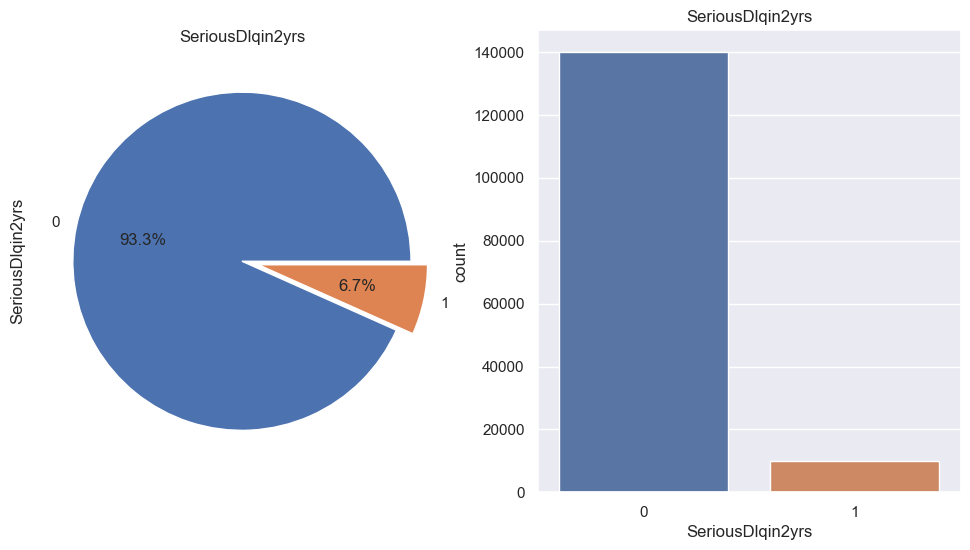

In [9]:
# df.SeriousDlqin2yrs.plot(kind='hist');

# sns.countplot(data=df, x='SeriousDlqin2yrs');

fig, axes = plt.subplots(1,2,figsize=(12,6))
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('SeriousDlqin2yrs')
sns.countplot(x='SeriousDlqin2yrs',data=df,ax=axes[1])
axes[1].set_title('SeriousDlqin2yrs')
plt.show();

### Checking for null values

- Only ```MonthlyIncome``` and ```NumberOfDependents``` have missing values

In [10]:
# % of null value in data
round(df.isna().sum(axis=0)*100/len(df))

SeriousDlqin2yrs                         0.0
RevolvingUtilizationOfUnsecuredLines     0.0
age                                      0.0
NumberOfTime30-59DaysPastDueNotWorse     0.0
DebtRatio                                0.0
MonthlyIncome                           20.0
NumberOfOpenCreditLinesAndLoans          0.0
NumberOfTimes90DaysLate                  0.0
NumberRealEstateLoansOrLines             0.0
NumberOfTime60-89DaysPastDueNotWorse     0.0
NumberOfDependents                       3.0
dtype: float64

### Data Statistics

- **Feature Scaling is needeed, features are on different scale.**

In [11]:
df.describe().T

count         mean           std  \
SeriousDlqin2yrs                      150000.0     0.066840      0.249746   
RevolvingUtilizationOfUnsecuredLines  150000.0     6.048438    249.755371   
age                                   150000.0    52.295207     14.771866   
NumberOfTime30-59DaysPastDueNotWorse  150000.0     0.421033      4.192781   
DebtRatio                             150000.0   353.005076   2037.818523   
MonthlyIncome                         120269.0  6670.221237  14384.674215   
NumberOfOpenCreditLinesAndLoans       150000.0     8.452760      5.145951   
NumberOfTimes90DaysLate               150000.0     0.265973      4.169304   
NumberRealEstateLoansOrLines          150000.0     1.018240      1.129771   
NumberOfTime60-89DaysPastDueNotWorse  150000.0     0.240387      4.155179   
NumberOfDependents                    146076.0     0.757222      1.115086   

                                      min          25%          50%  \
SeriousDlqin2yrs                      0.0     0.000000     0.000000   
RevolvingUtilizationOfUnsecuredLines  0.0     0.029867     0.154181   
age                                   0.0    41.000000    52.000000   
NumberOfTime30-59DaysPastDueNotWorse  0.0     0.000000     0.000000   
DebtRatio                             0.0     0.175074     0.366508   
MonthlyIncome                         0.0  3400.000000  5400.000000   
NumberOfOpenCreditLinesAndLoans       0.0     5.000000     8.000000   
NumberOfTimes90DaysLate               0.0     0.000000     0.000000   
NumberRealEstateLoansOrLines          0.0     0.000000     1.000000   
NumberOfTime60-89DaysPastDueNotWorse  0.0     0.000000     0.000000   
NumberOfDependents                    0.0     0.000000     0.000000   

                                              75%        max  
SeriousDlqin2yrs                         0.000000        1.0  
RevolvingUtilizationOfUnsecuredLines     0.559046    50708.0  
age                                     63.000000      109.0  
NumberOfTime30-59DaysPastDueNotWorse     0.000000       98.0  
DebtRatio                                0.868254   329664.0  
MonthlyIncome                         8249.000000  3008750.0  
NumberOfOpenCreditLinesAndLoans         11.000000       58.0  
NumberOfTimes90DaysLate                  0.000000       98.0  
NumberRealEstateLoansOrLines             2.000000       54.0  
NumberOfTime60-89DaysPastDueNotWorse     0.000000       98.0  
NumberOfDependents                       1.000000       20.0

### Correlation

- ```NumberOfTime60-89DaysPastDueNotWorse``` is highly corelated with ```NumberOfTime30-59DaysPastDueNotWorse``` & ```NumberOfTimes90DaysLate```

- ```NumberOfTimes90DaysLate``` is highly corelated with ```NumberOfTime30-59DaysPastDueNotWorse```

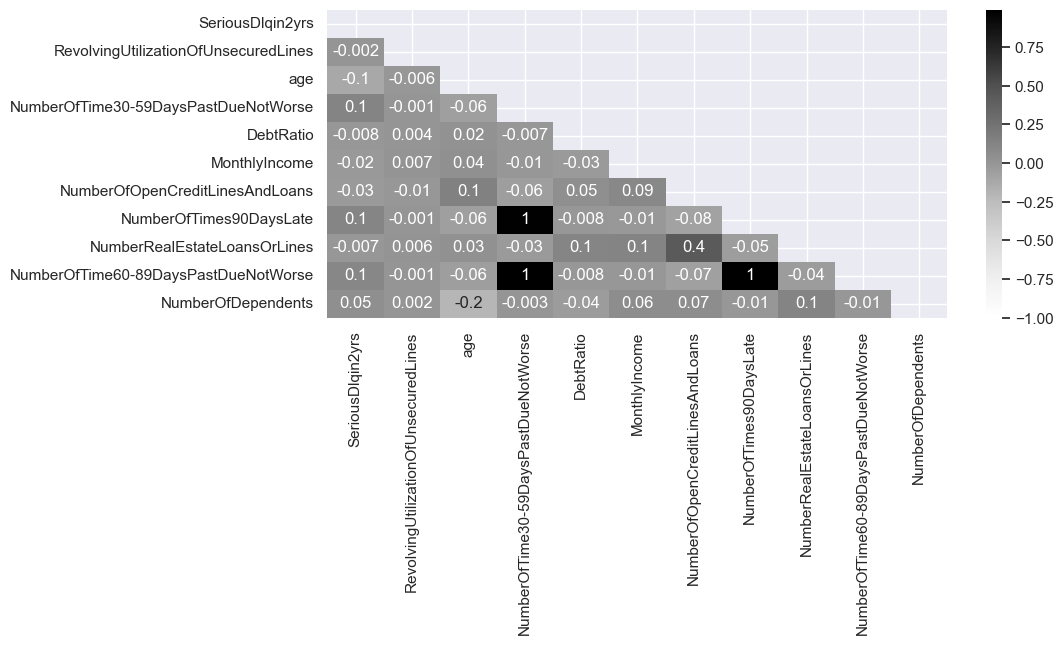

In [11]:
correl = df.corr()
mask = np.zeros_like(correl, dtype=np.bool_) 

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(correl, mask=mask, vmin=-1, cmap='Greys', 
            annot=True, fmt='.1g',)
plt.show();

### VIF - Checking Multicollinearity

Typically, a VIF value exceeding 5 or 10 is deemed to be too high. Any feature with such VIF values is likely to be contributing to multicollinearity.

- **Dropping these two coloumns [```'NumberOfTime60-89DaysPastDueNotWorse'```,```'NumberOfTimes90DaysLate'```] significantly decreases the Multicollinearity.**

- **Also correlation among features is highly decreased after removing above columns**

#### ***Diff. b/w Corelation and Multicollinearity***

- **Correlation refers to an increase/decrease in a dependent variable with an increase/decrease in an independent variable.** 
- **Collinearity refers to two or more independent variables acting in concert to explain the variation in a dependent variable.**

In [12]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(df,considered_features):
    
    X = df[considered_features]
    X = X.dropna(axis=0)
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [13]:
compute_vif(df, df.columns.tolist()).sort_values('VIF', ascending=False)

Variable        VIF
9   NumberOfTime60-89DaysPastDueNotWorse  62.224815
7                NumberOfTimes90DaysLate  49.653250
3   NumberOfTime30-59DaysPastDueNotWorse  27.266008
6        NumberOfOpenCreditLinesAndLoans   1.282246
8           NumberRealEstateLoansOrLines   1.249675
2                                    age   1.099754
10                    NumberOfDependents   1.069719
0                       SeriousDlqin2yrs   1.054921
5                          MonthlyIncome   1.022792
4                              DebtRatio   1.001504
1   RevolvingUtilizationOfUnsecuredLines   1.000328

In [14]:
df1 = df.drop(['NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate'], axis=1)

compute_vif(df1, df1.columns.tolist()).sort_values('VIF', ascending=False)

Variable       VIF
6       NumberOfOpenCreditLinesAndLoans  1.265612
7          NumberRealEstateLoansOrLines  1.249104
2                                   age  1.099198
8                    NumberOfDependents  1.068951
0                      SeriousDlqin2yrs  1.026310
5                         MonthlyIncome  1.022782
3  NumberOfTime30-59DaysPastDueNotWorse  1.018121
4                             DebtRatio  1.001477
1  RevolvingUtilizationOfUnsecuredLines  1.000327

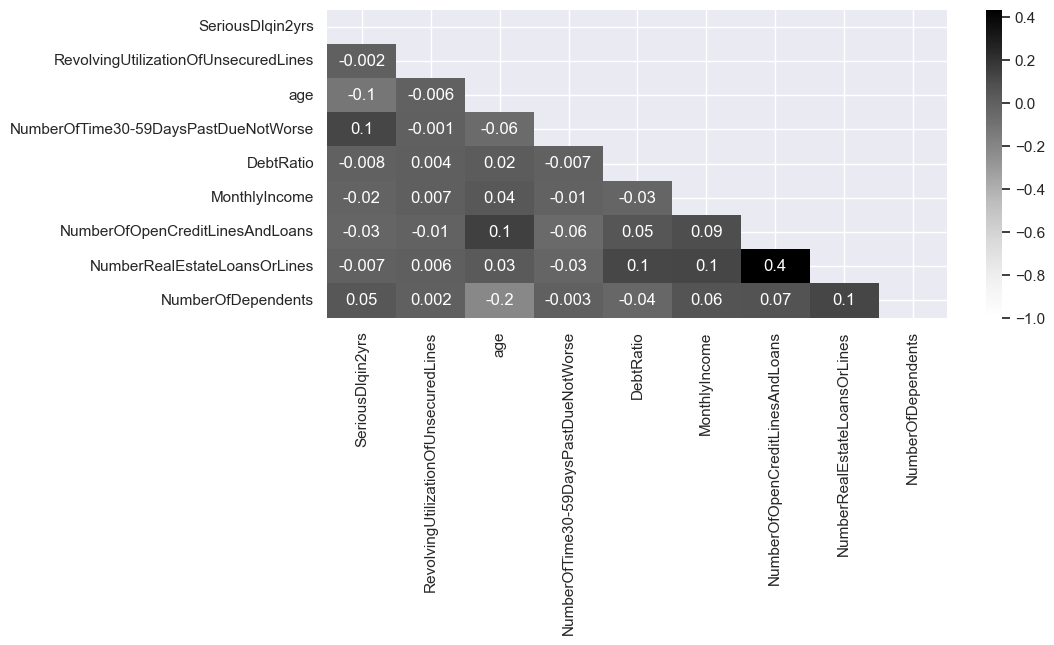

In [15]:
# Computing correlation after removing multicollinearity

correl = df1.corr()
mask = np.zeros_like(correl, dtype=np.bool_) 

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(correl, mask=mask, vmin=-1, cmap='Greys', 
            annot=True, fmt='.1g',)
plt.show();

### Splitting into test-train test

* **We will split the dataset into training(80%) on which modeling will be done using statistical/machine learning technqiues**
* **
* **Another one is the test dataset(20%) on which predictions will be made and check how the model is performing**

In [5]:
from sklearn.model_selection import train_test_split

data = df.drop(columns = ['SeriousDlqin2yrs'], axis=1)
y = df['SeriousDlqin2yrs']

# Splitting the dataset into train and test validation
df_test, df_train, y_test, y_train = train_test_split(data, y, test_size = 0.8, random_state=42, stratify = y)

df_test.shape, df_train.shape

((30000, 10), (120000, 10))

In [13]:
print('Event rate in the training dataset : ',np.mean(y_train))
print('Event rate in the test dataset : ',np.mean(y_test))
print('Event rate in the entire dataset : ',np.mean(y))

# Event rate/Default Rate is maintainted in the training and test dataset 
# after splitting in line with the entire dataset

Event rate in the training dataset :  0.06684166666666666
Event rate in the test dataset :  0.06683333333333333
Event rate in the entire dataset :  0.06684


In [14]:
train = pd.concat([df_train, y_train], axis=1)
test = pd.concat([df_test, y_test], axis=1)

test.shape, train.shape

((30000, 11), (120000, 11))

## Univariate Analysis using Training Numerical dataset

#### Skewness
- Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

- The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. 

- Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right. By skewed left, we mean that the left tail is long relative to the right tail. Similarly, skewed right means that the right tail is long relative to the left tail. If the data are multi-modal, then this may affect the sign of the skewness.

![skewness](https://qph.cf2.quoracdn.net/main-qimg-ca890a923146f641dff54d15dcbdbf92)

#### Kurtosis
- Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. 

- That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

- Positive kurtosis indicates a "heavy-tailed" distribution and negative kurtosis indicates a "light tailed" distribution.

- The kurtosis for a standard normal distribution is 3.

![kurtosis](https://av-eks-blogoptimized.s3.amazonaws.com/57983kurt1.png)

In [15]:
import math
from scipy.stats import kurtosis
from scipy import stats, special
from scipy.stats import skew

def plot_hist_boxplot(column):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(train[train[column].notnull()][column],ax=ax1)
    sns.boxplot(y=train[train[column].notnull()][column],ax=ax2)
    print("Skewness:", skew(train[train[column].notnull()][column]))
    print("Kurtosis:", kurtosis(train[train[column].notnull()][column]))
    plt.show()

    
def plot_count_boxplot(column):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
    sns.countplot(train[train[column].notnull()][column],ax=ax1)
    sns.boxplot(y=train[train[column].notnull()][column],ax=ax2)
    print("Skewness:", skew(train[train[column].notnull()][column]))
    print("Kurtosis:", kurtosis(train[train[column].notnull()][column]))
    plt.show()

RevolvingUtilizationOfUnsecuredLines
------------------------------------
Skewness: 104.51383625945637
Kurtosis: 16544.639125909292


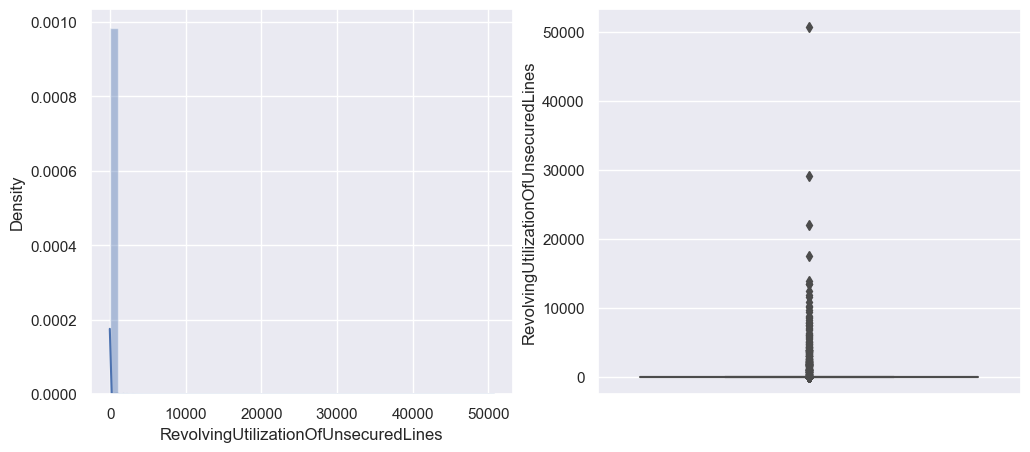

--------------------------------------------------------------------------------
age
---
Skewness: 0.1883379862757487
Kurtosis: -0.4989842553901078


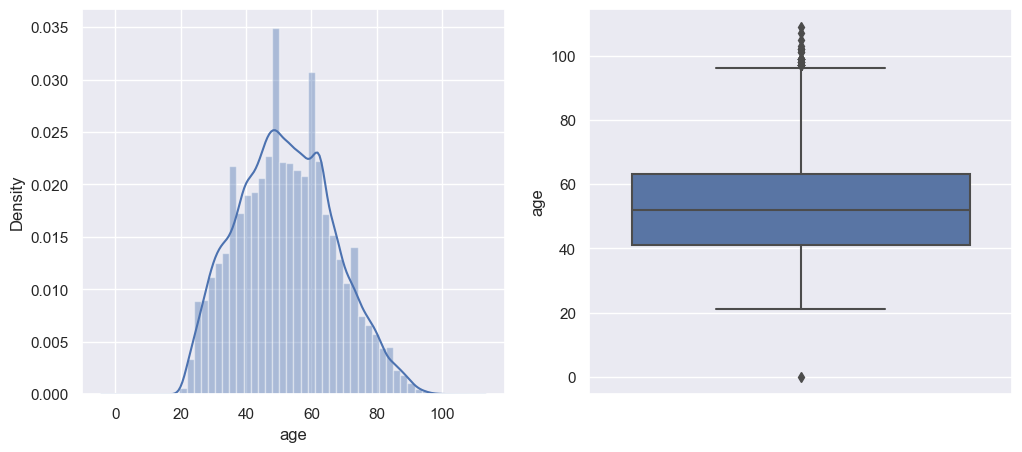

--------------------------------------------------------------------------------
NumberOfTime30-59DaysPastDueNotWorse
------------------------------------
Skewness: 22.56005009391927
Kurtosis: 520.5861400129826


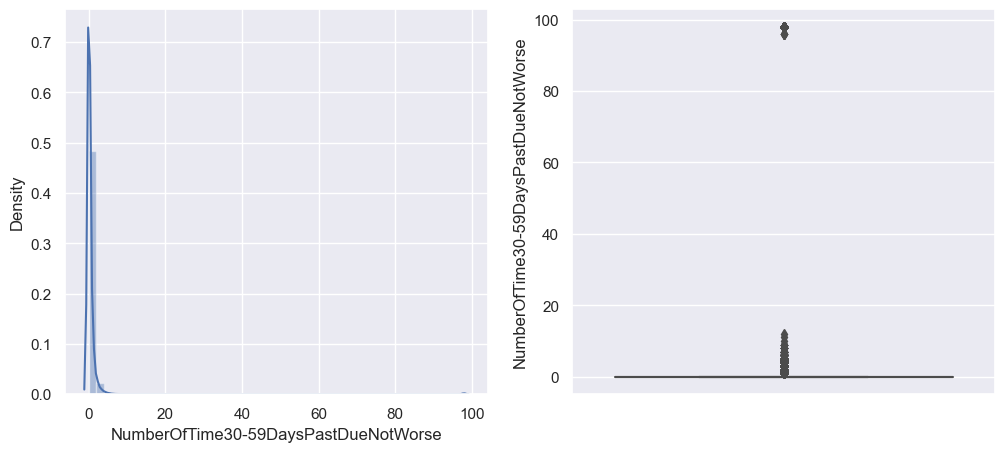

--------------------------------------------------------------------------------
DebtRatio
---------
Skewness: 95.78845308753385
Kurtosis: 14212.893907176613


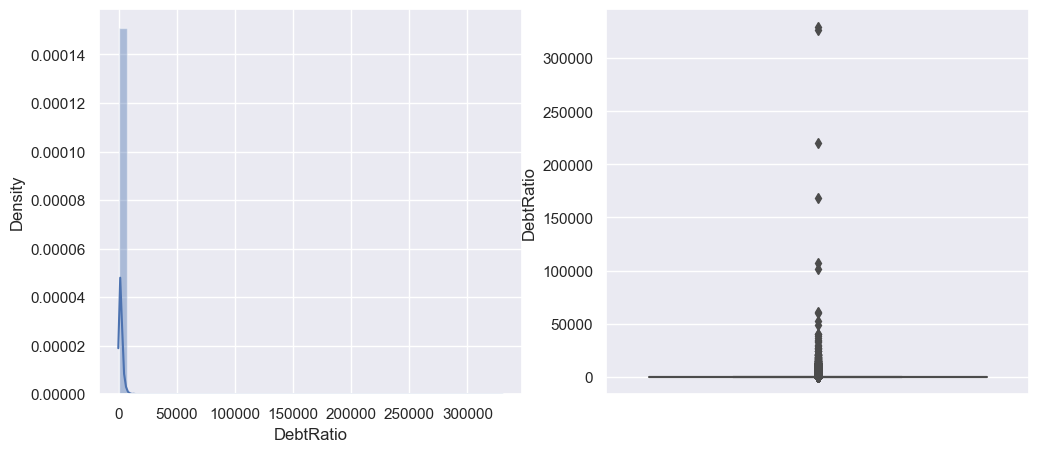

--------------------------------------------------------------------------------
MonthlyIncome
-------------
Skewness: 117.98020100894865
Kurtosis: 19658.712451467025


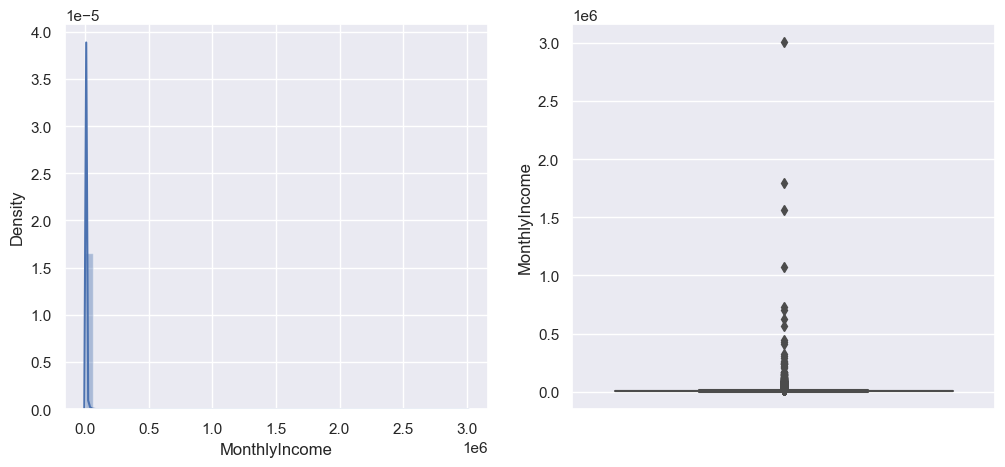

--------------------------------------------------------------------------------
NumberOfOpenCreditLinesAndLoans
-------------------------------
Skewness: 1.2145901173605567
Kurtosis: 3.114685912968633


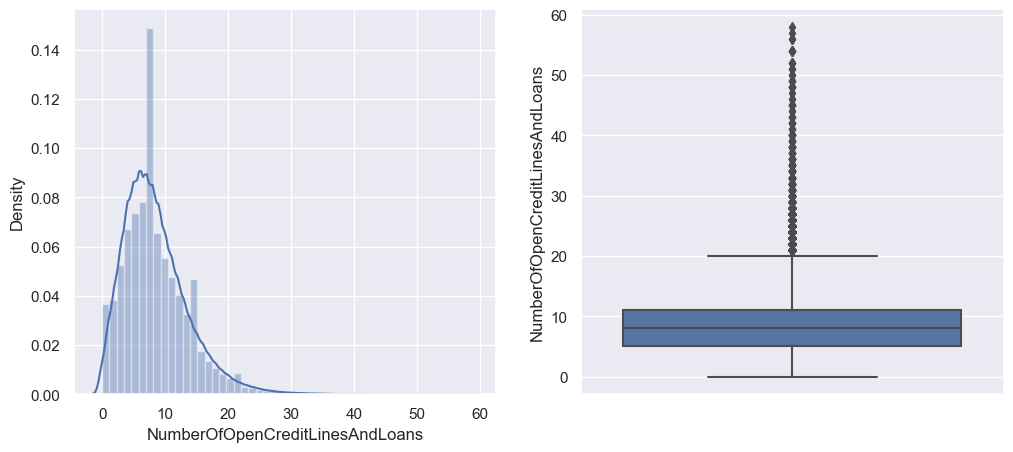

--------------------------------------------------------------------------------
NumberOfTimes90DaysLate
-----------------------
Skewness: 23.0371547196054
Kurtosis: 535.4918343524778


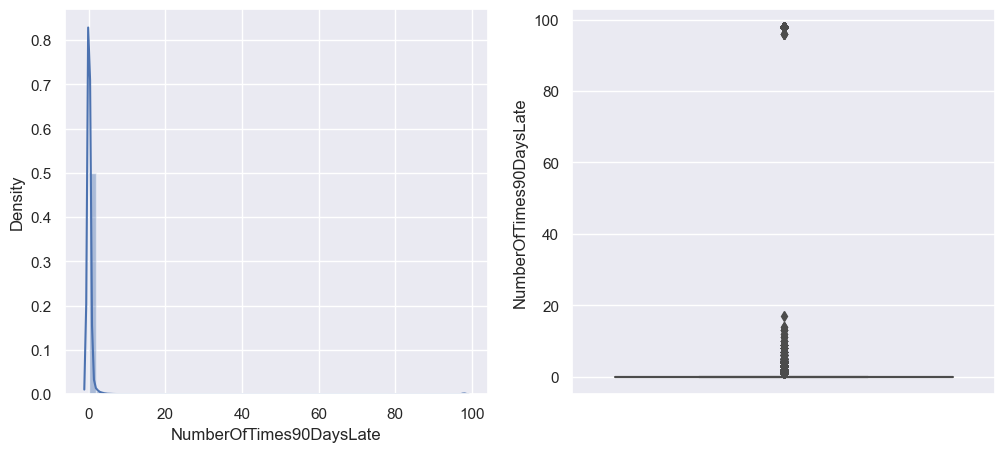

--------------------------------------------------------------------------------
NumberRealEstateLoansOrLines
----------------------------
Skewness: 3.635466187390173
Kurtosis: 67.79380246787325


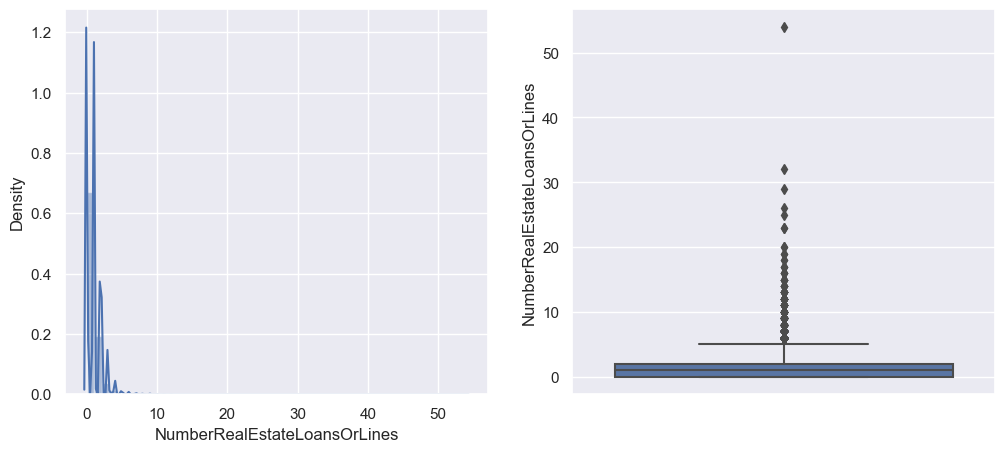

--------------------------------------------------------------------------------
NumberOfTime60-89DaysPastDueNotWorse
------------------------------------
Skewness: 23.287569502079286
Kurtosis: 543.6121286456557


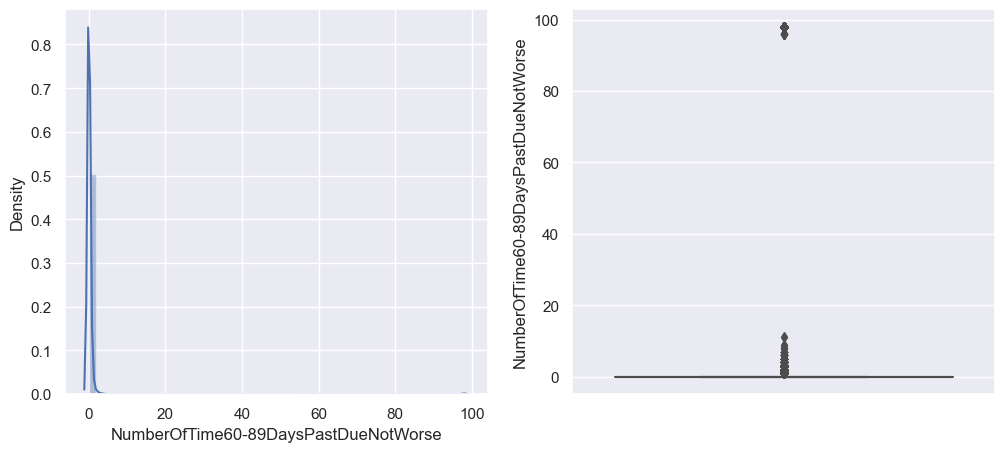

--------------------------------------------------------------------------------
NumberOfDependents
------------------
Skewness: 1.5991497659767622
Kurtosis: 3.1681417562669285


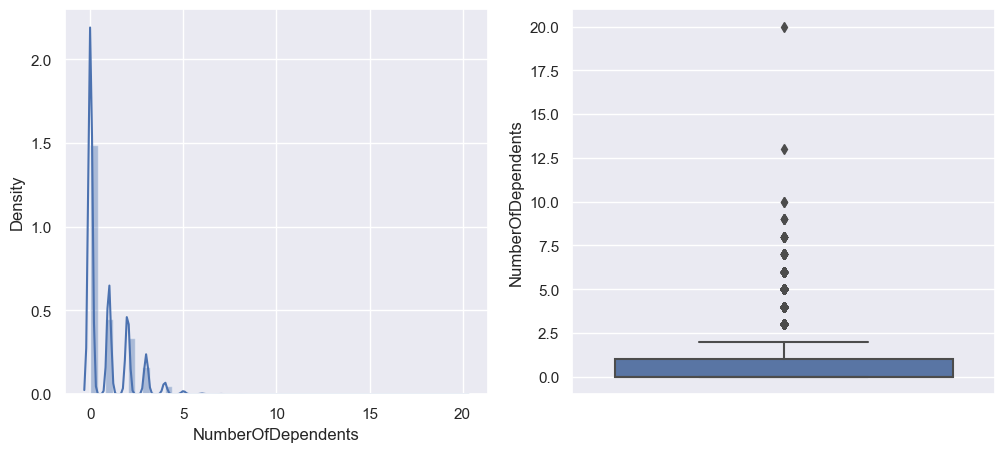

--------------------------------------------------------------------------------
SeriousDlqin2yrs
----------------
Skewness: 3.4687688869002438
Kurtosis: 10.032357590727166


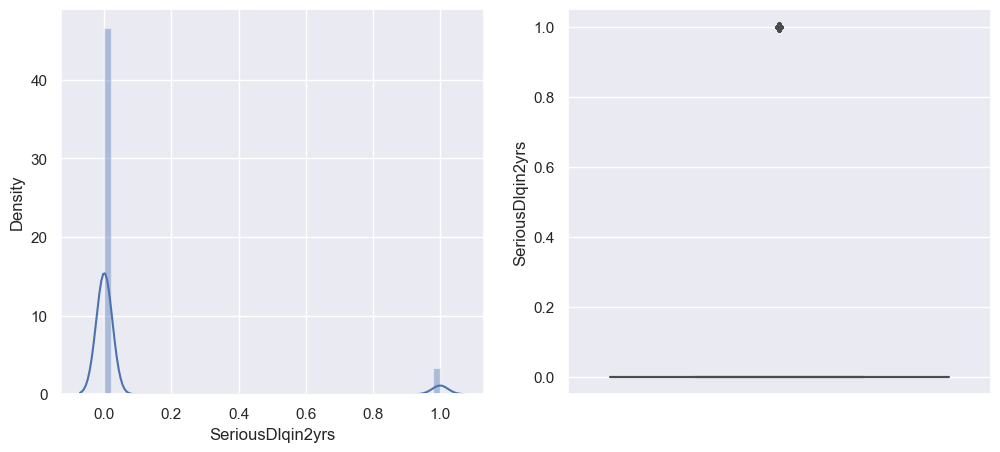

--------------------------------------------------------------------------------


In [16]:
for col in train.columns.tolist():
    print(col)
    print('-'*len(col))
    plot_hist_boxplot(col)
    print('-'*80)

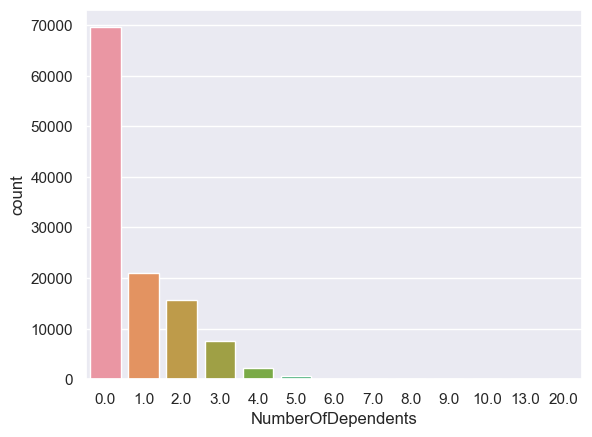

In [17]:
# for col in train.columns.tolist():
#     print(col)
#     print('-'*len(col))
#     plot_count_boxplot(col)
#     print('-'*80)

sns.countplot(data=train, x='NumberOfDependents');

In [18]:
skewness  = [] ; kurt = []
for column in train.columns:
    skewness.append(skew(train[train[column].notnull()][column]))
    kurt.append(kurtosis(train[train[column].notnull()][column]))
    
stats = pd.DataFrame({'Skewness' : skewness, 'Kurtosis' : kurt},index=train.columns)
stats.sort_values(by=['Skewness'], ascending=False)

Skewness      Kurtosis
MonthlyIncome                         117.980201  19658.712451
RevolvingUtilizationOfUnsecuredLines  104.513836  16544.639126
DebtRatio                              95.788453  14212.893907
NumberOfTime60-89DaysPastDueNotWorse   23.287570    543.612129
NumberOfTimes90DaysLate                23.037155    535.491834
NumberOfTime30-59DaysPastDueNotWorse   22.560050    520.586140
NumberRealEstateLoansOrLines            3.635466     67.793802
SeriousDlqin2yrs                        3.468769     10.032358
NumberOfDependents                      1.599150      3.168142
NumberOfOpenCreditLinesAndLoans         1.214590      3.114686
age                                     0.188338     -0.498984

* **Data distribution in the columns are highly right skewed with very high kurtosis value showing extreme outliers in those columns**

* Except age which is little normally distributed

## Data Cleaning

### Outlier Treatement

* *From the above boxplot graphs we can observe:*

    * *In the columns NumberOfTime30-59DaysPastDueNotWorse , NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate, we see delinquency range beyond 90 which is common across all 3 features.*

    * *Treating outliers for the columns  -- NumberOfTime30-59DaysPastDueNotWorse , NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate*

In [19]:
train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs'].sum()

120

In [20]:
cols = ['NumberOfTime30-59DaysPastDueNotWorse' , 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']

print('TRAIN DATASET\n')
print('Unique Values >= 90 in the foll. cols:')
print('--------------------------------------')
for col in cols:
    y = train[col].unique()
    print(col, ':', y[y>=90])

print('\n')
print('Unique Values < 90 in the foll. cols:')
print('--------------------------------------')
for col in cols:
    y = train[col].unique()
    print(col, ':', np.sort(y[y<90]))
    
print('\n')

print("Proportion of positive class with 96/98 values:",
      round(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs'].sum()*100/
      len(train[train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs']),2),'%')

TRAIN DATASET

Unique Values >= 90 in the foll. cols:
--------------------------------------
NumberOfTime30-59DaysPastDueNotWorse : [98 96]
NumberOfTime60-89DaysPastDueNotWorse : [98 96]
NumberOfTimes90DaysLate : [98 96]


Unique Values < 90 in the foll. cols:
--------------------------------------
NumberOfTime30-59DaysPastDueNotWorse : [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
NumberOfTime60-89DaysPastDueNotWorse : [ 0  1  2  3  4  5  6  7  8  9 11]
NumberOfTimes90DaysLate : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 17]


Proportion of positive class with 96/98 values: 55.56 %


* *We can see from the following that when records in column 'NumberOfTime30-59DaysPastDueNotWorse' are more than 90, the other columns that records number of times payments are past due X days also have the same values. We will classify these as special labels since the proportion of positive class is abnormally high at 55.56%.*
* **
* *These 96 and 98 values can be viewed as accounting errors. Hence, we would replace them with the maximum value before 96 i.e. 12, 11 and 17*

In [21]:
train.loc[train['NumberOfTime30-59DaysPastDueNotWorse'] >= 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 12
train.loc[train['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 11
train.loc[train['NumberOfTimes90DaysLate'] >= 90, 'NumberOfTimes90DaysLate'] = 17

In [22]:
for col in cols:
    print(col+':', np.unique(train[col]))

NumberOfTime30-59DaysPastDueNotWorse: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
NumberOfTime60-89DaysPastDueNotWorse: [ 0  1  2  3  4  5  6  7  8  9 11]
NumberOfTimes90DaysLate: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 17]


In [23]:
cols = ['NumberOfTime30-59DaysPastDueNotWorse' , 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']

print('TEST DATASET\n')
print('Unique Values >= 90 in the foll. cols:')
print('--------------------------------------')
for col in cols:
    y = test[col].unique()
    print(col+':', y[y>=90])

print('\n')
print('Unique Values < 90 in the foll. cols:')
print('--------------------------------------')
for col in cols:
    y = test[col].unique()
    print(col+':', np.sort(y[y<90]))

TEST DATASET

Unique Values >= 90 in the foll. cols:
--------------------------------------
NumberOfTime30-59DaysPastDueNotWorse: [98]
NumberOfTime60-89DaysPastDueNotWorse: [98]
NumberOfTimes90DaysLate: [98]


Unique Values < 90 in the foll. cols:
--------------------------------------
NumberOfTime30-59DaysPastDueNotWorse: [ 0  1  2  3  4  5  6  7  8  9 10 12 13]
NumberOfTime60-89DaysPastDueNotWorse: [0 1 2 3 4 5 6 7]
NumberOfTimes90DaysLate: [ 0  1  2  3  4  5  6  7  8  9 10 11 15]


*Since, these values exist in Test Set as well. Therefore, replacing them with maximum values before 96 and 98 i.e. 13, 7 and 15.*

In [24]:
test.loc[test['NumberOfTime30-59DaysPastDueNotWorse'] >= 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 13
test.loc[test['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 7
test.loc[test['NumberOfTimes90DaysLate'] >= 90, 'NumberOfTimes90DaysLate'] = 15


for col in cols:
    print(col+':', np.unique(test[col]))

NumberOfTime30-59DaysPastDueNotWorse: [ 0  1  2  3  4  5  6  7  8  9 10 12 13]
NumberOfTime60-89DaysPastDueNotWorse: [0 1 2 3 4 5 6 7]
NumberOfTimes90DaysLate: [ 0  1  2  3  4  5  6  7  8  9 10 11 15]


#### Checking for **DebtRatio** and **RevolvingUtilizationOfUnsecuredLines.**

- **DebtRatio**

In [25]:
train[['DebtRatio','RevolvingUtilizationOfUnsecuredLines']].describe()

DebtRatio  RevolvingUtilizationOfUnsecuredLines
count  120000.000000                         120000.000000
mean      350.913763                              5.986096
std      1985.649364                            251.444207
min         0.000000                              0.000000
25%         0.174335                              0.029737
50%         0.365643                              0.154659
75%         0.866853                              0.559328
max    329664.000000                          50708.000000

- Above we can see that in **Debt Ratio** coloumn, ```mean >> median```. => that the data is right skewed.

- So, our main aim would be to check the potential outliers beyond 95% quantiles. However, since our data is 120,000, let's consider 95% and 97.5% quantiles for our further analysis.

In [26]:
train[train['DebtRatio'] >= train['DebtRatio'].quantile(0.95)][['SeriousDlqin2yrs','MonthlyIncome', 'DebtRatio']].describe()

SeriousDlqin2yrs  MonthlyIncome      DebtRatio
count       6002.000000     308.000000    6002.000000
mean           0.054315       0.077922    4382.502666
std            0.226658       0.268485    7618.672443
min            0.000000       0.000000    2446.000000
25%            0.000000       0.000000    2879.250000
50%            0.000000       0.000000    3479.500000
75%            0.000000       0.000000    4604.000000
max            1.000000       1.000000  329664.000000

* Here we can observe:
* **
* Out of 6002 customers falling in the last 5 percentile of the data i.e. the number of times their debt is higher than their income, only 308 have Monthly Income values.

* The Max for Monthly Income is 1 and Min is 0 which makes us wonder that are data entry errors. Let's check whether the Serious Delinquency in 2 years and Monthly Income values are equal.

In [27]:
train[(train["DebtRatio"] > train["DebtRatio"].quantile(0.95)) & (train['SeriousDlqin2yrs'] == train['MonthlyIncome'])].shape

(271, 11)

* Hence, our suspects are true and there are 271 out of 308 rows where Monthly Income is equal to the Serious Delinquencies in 2 years. Hence we will remove these 271 outliers from our analysis as their current values aren't useful for our predictive modelling and will add to the bias and variance.

In [28]:
new_train = train[-((train["DebtRatio"] > train["DebtRatio"].quantile(0.95)) & (train['SeriousDlqin2yrs'] == train['MonthlyIncome']))]
new_train.shape

(119729, 11)

* **Revolving Utilization of Unsecured Lines**

    - This field basically represents the ratio of the amount owed by the credit limit of a customer.
    
    - A ratio > 1 is considered to be a serious defaulter. 
    
    - A Ratio of 10 functionally also seems possible, 
    
Let's see how many of these customers have the Revolving Utilization of Unsecured Lines greater than 10.

In [29]:
new_train[new_train['RevolvingUtilizationOfUnsecuredLines']>10].describe()

RevolvingUtilizationOfUnsecuredLines         age  \
count                            187.000000  187.000000   
mean                            3634.411136   50.989305   
std                             5247.138619   14.651136   
min                               14.000000   24.000000   
25%                              953.000000   39.000000   
50%                             2120.000000   49.000000   
75%                             4240.000000   63.000000   
max                            50708.000000   87.000000   

       NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
count                            187.000000   187.000000     133.000000   
mean                               0.176471   522.932048    9020.067669   
std                                0.544654  1205.632700    7156.622316   
min                                0.000000     0.000800       0.000000   
25%                                0.000000     0.217823    5000.000000   
50%                                0.000000     0.381491    7083.000000   
75%                                0.000000    90.000000   10575.000000   
max                                3.000000  6820.000000   44472.000000   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                       187.000000               187.000000   
mean                          5.614973                 0.080214   
std                           3.100709                 0.646732   
min                           1.000000                 0.000000   
25%                           4.000000                 0.000000   
50%                           5.000000                 0.000000   
75%                           7.000000                 0.000000   
max                          21.000000                 8.000000   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
count                    187.000000                            187.000000   
mean                       1.208556                              0.080214   
std                        1.094626                              0.603737   
min                        0.000000                              0.000000   
25%                        1.000000                              0.000000   
50%                        1.000000                              0.000000   
75%                        2.000000                              0.000000   
max                        9.000000                              7.000000   

       NumberOfDependents  SeriousDlqin2yrs  
count          179.000000        187.000000  
mean             0.687151          0.048128  
std              1.045269          0.214612  
min              0.000000          0.000000  
25%              0.000000          0.000000  
50%              0.000000          0.000000  
75%              1.000000          0.000000  
max              4.000000          1.000000

In [34]:
temp = new_train[new_train['RevolvingUtilizationOfUnsecuredLines']>10]

temp[temp['SeriousDlqin2yrs']==1].shape[0]

9

- Out  of these 187 people who have, ```RevolvingUtilizationOfUnsecuredLines```>10, above we can see, less than 10 people are falling in the serious delinquency which means this might be another error. 

- Even if it is not an error, these numbers will add huge bias and variance to our final predictions. Therefore, the best decision is to remove these values.

In [35]:
new_train = new_train[new_train['RevolvingUtilizationOfUnsecuredLines']<=10]
new_train.shape

(119542, 11)

In [36]:
new_test = test[test['RevolvingUtilizationOfUnsecuredLines']<=10]
new_test.shape

(29946, 11)

#### **Age**

In [37]:
new_train[['age', 'SeriousDlqin2yrs']].describe()

age  SeriousDlqin2yrs
count  119542.000000     119542.000000
mean       52.296130          0.067006
std        14.775558          0.250033
min         0.000000          0.000000
25%        41.000000          0.000000
50%        52.000000          0.000000
75%        63.000000          0.000000
max       109.000000          1.000000

- **It can be observed that the data includes a record with age = 0 which is not a valid age ,updating the record with mode age.**

- **We will be replacing the error/odd value with the mode**

In [38]:
new_train[new_train['age']==0]

RevolvingUtilizationOfUnsecuredLines  age  \
65695                                   1.0    0   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
65695                                     1   0.436927         6000.0   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
65695                                6                        0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
65695                             2                                     0   

       NumberOfDependents  SeriousDlqin2yrs  
65695                 2.0                 0

In [39]:
new_train.loc[new_train['age'] == 0, 'age'] = new_train.age.mode()[0]

new_train['age'].min()

21

In [40]:
new_test['age'].describe()

count    29946.000000
mean        52.319175
std         14.785686
min         21.000000
25%         41.000000
50%         52.000000
75%         63.000000
max        109.000000
Name: age, dtype: float64

* No such discrepancy is found in the test dataset

### Missing Value Treatment

* *Since MonthlyIncome is an integer value, we will replace the nulls with the median values instead of mean as it was heavily right skewed.*
* **
* *Number of Dependents can be characterized as a categorical variable, hence if customers have NA for number of dependents, it means that they do not have any dependents. 
Filling either by mode which is 0 or by the above assumption is the same.Therefore, we fill them with zeros.*

In [41]:
def MissingHandler(df):
    
    DataMissing = df.isnull().sum()*100/len(df)
    DataMissingByColumn = pd.DataFrame({'Percentage Nulls':DataMissing})
    DataMissingByColumn.sort_values(by='Percentage Nulls',ascending=False,inplace=True)
    return DataMissingByColumn[DataMissingByColumn['Percentage Nulls']>0]

MissingHandler(new_train)

Percentage Nulls
MonthlyIncome              19.820649
NumberOfDependents          2.612471

In [42]:
# train dataset
new_train['MonthlyIncome'].fillna(new_train['MonthlyIncome'].median(), inplace=True)
new_train['NumberOfDependents'].fillna(0, inplace = True)

# test dataset
new_test['MonthlyIncome'].fillna(new_test['MonthlyIncome'].median(), inplace=True)
new_test['NumberOfDependents'].fillna(0, inplace = True)

In [43]:
# Rechecking Nulls

MissingHandler(new_train)
MissingHandler(new_test)

Empty DataFrame
Columns: [Percentage Nulls]
Index: []

In [44]:
MissingHandler(df_test)

Percentage Nulls
MonthlyIncome              19.943333
NumberOfDependents          2.643333

### Correlation

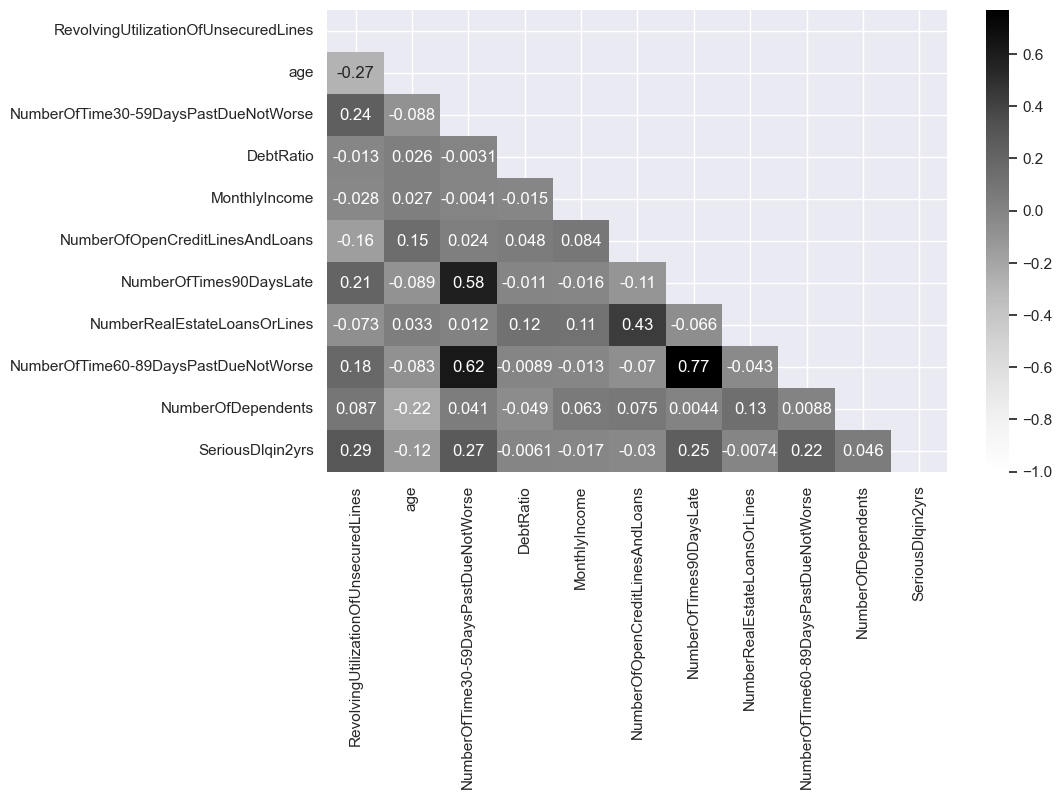

In [45]:
correl = new_train.corr()
mask = np.zeros_like(correl, dtype=np.bool_) 

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correl, mask=mask, vmin=-1, cmap='Greys', 
            annot=True, fmt='.2g',)
plt.show();

* From the correlation heatmap above, we can see the most correlated values to SeriousDlqin2yrs are NumberOfTime30-59DaysPastDueNotWorse , NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate.
* **
* Number of Open Credit Lines and Loans and Number of Real Estate Loans or Lines also have a significant correlation

## Bivariate Analysis

In [46]:
def boxplot_violinplot(col1, col2):
    '''
    Here,Boxplot shows how data is distributed at various percentile 
    w.r.to target variable, and 
    Violenplot shows the density of data at various percentile. 
    '''
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
    sns.boxplot(x=col1, y=col2, data=new_train, palette='Set3',ax=ax1)
    sns.violinplot(x=col1, y=col2, data=new_train, palette='Set3',ax=ax2)
    plt.show()

age


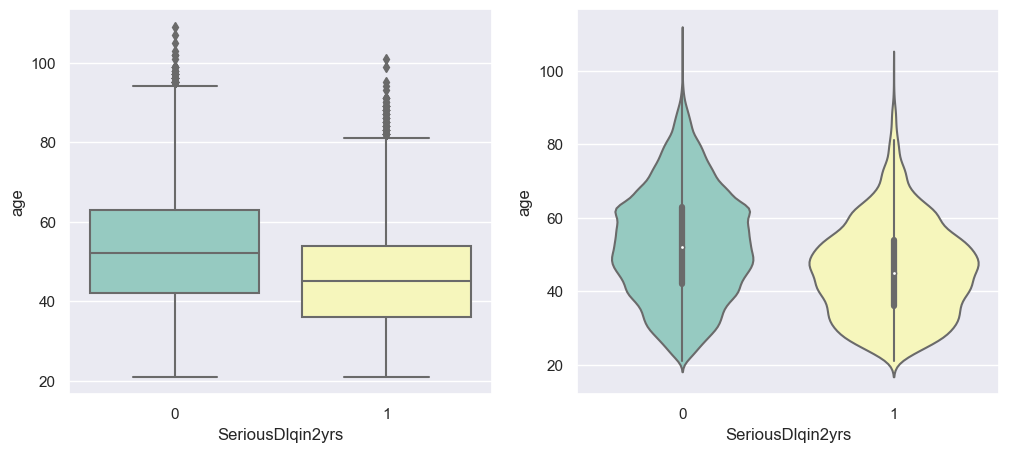

------------------------------------------------------------
MonthlyIncome


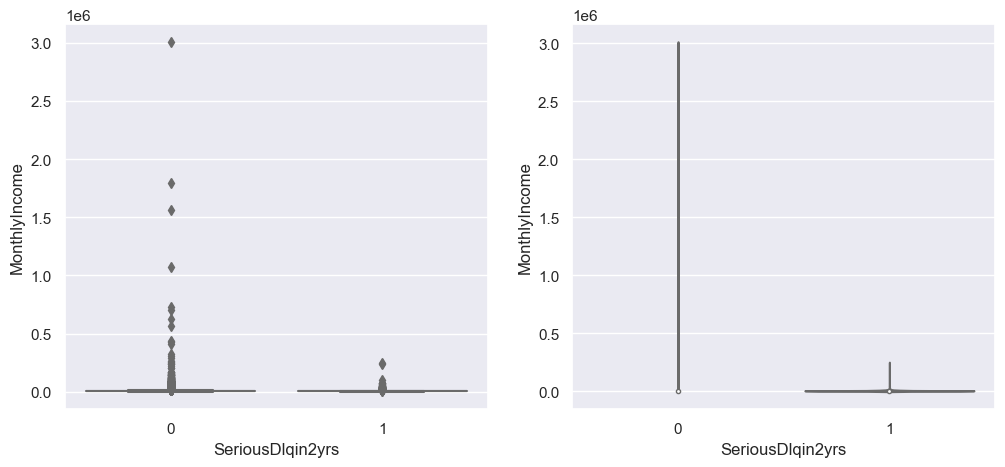

------------------------------------------------------------
DebtRatio


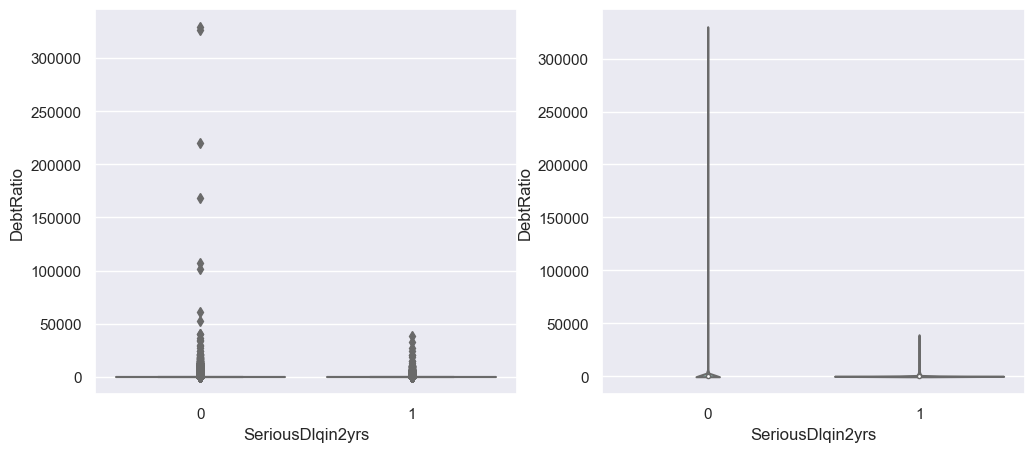

------------------------------------------------------------
NumberOfOpenCreditLinesAndLoans


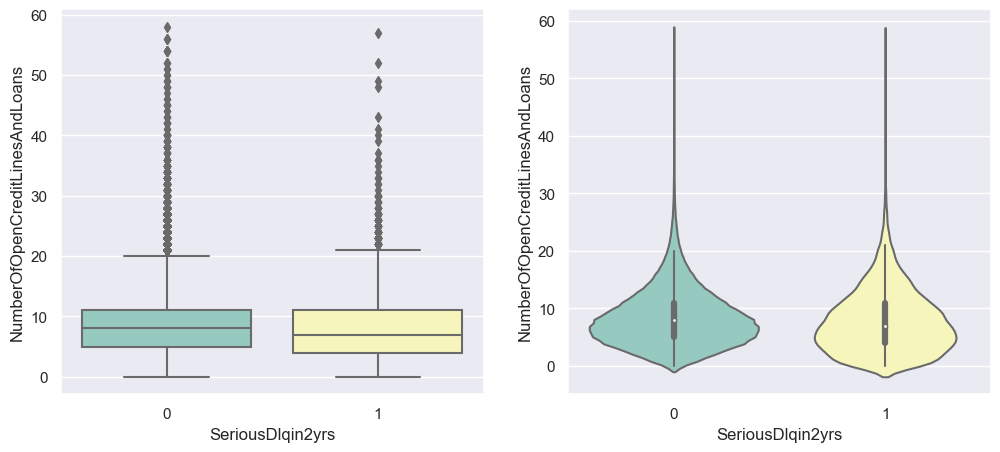

------------------------------------------------------------
NumberRealEstateLoansOrLines


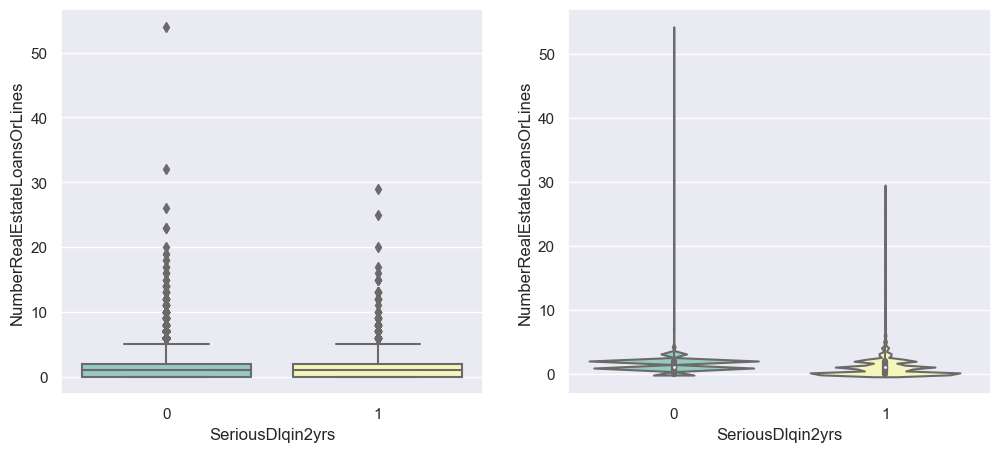

------------------------------------------------------------
RevolvingUtilizationOfUnsecuredLines


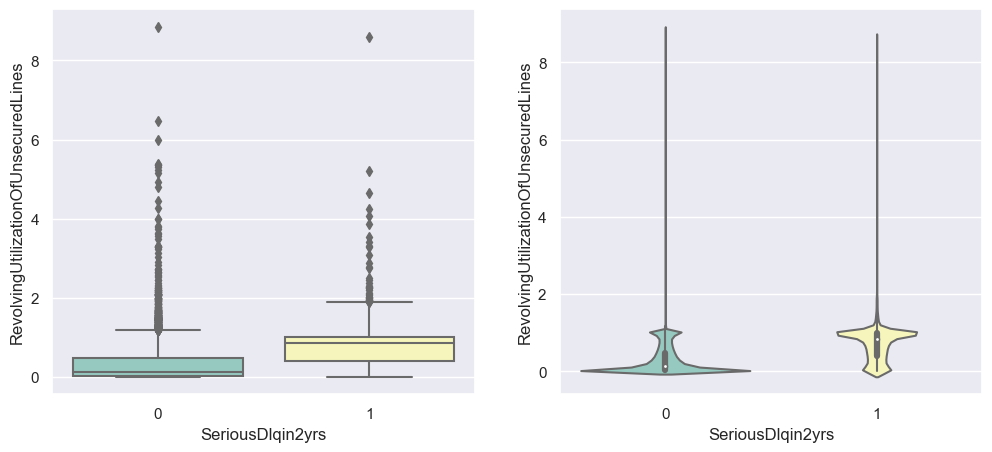

------------------------------------------------------------
NumberOfDependents


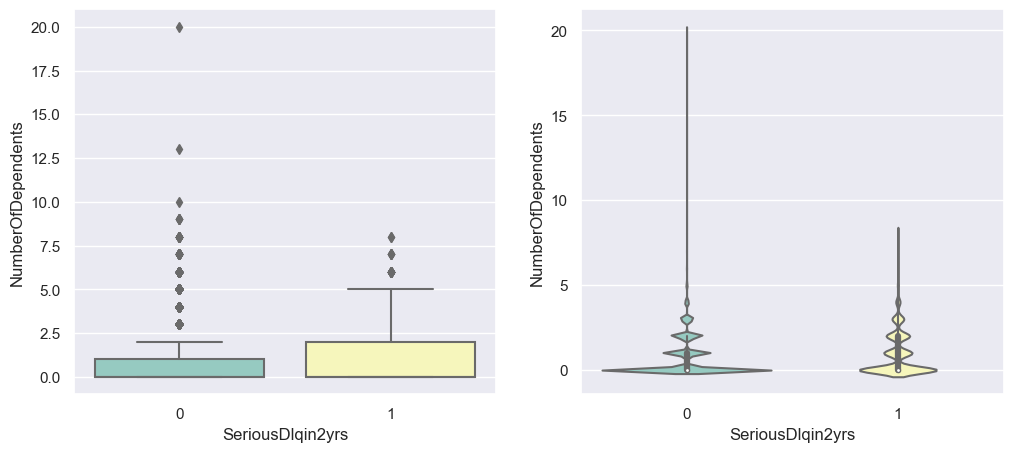

------------------------------------------------------------
NumberOfTime30-59DaysPastDueNotWorse


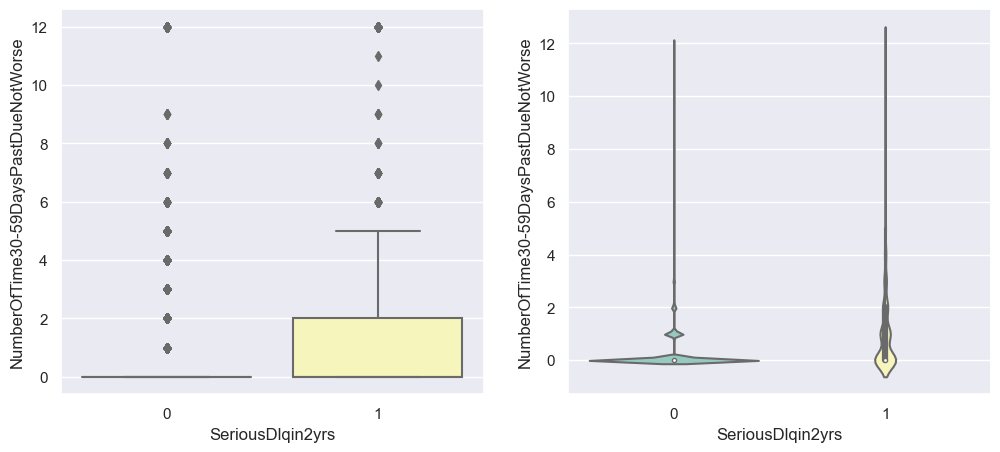

------------------------------------------------------------
NumberOfTime60-89DaysPastDueNotWorse


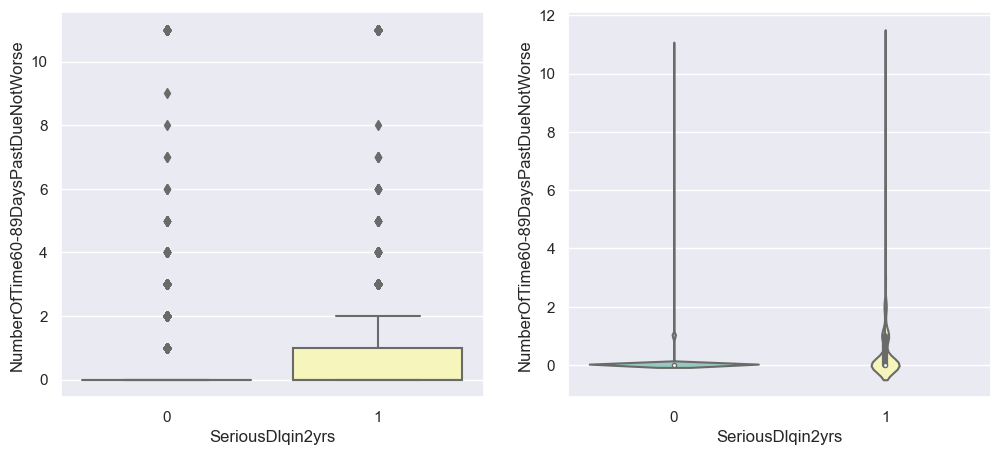

------------------------------------------------------------
NumberOfTimes90DaysLate


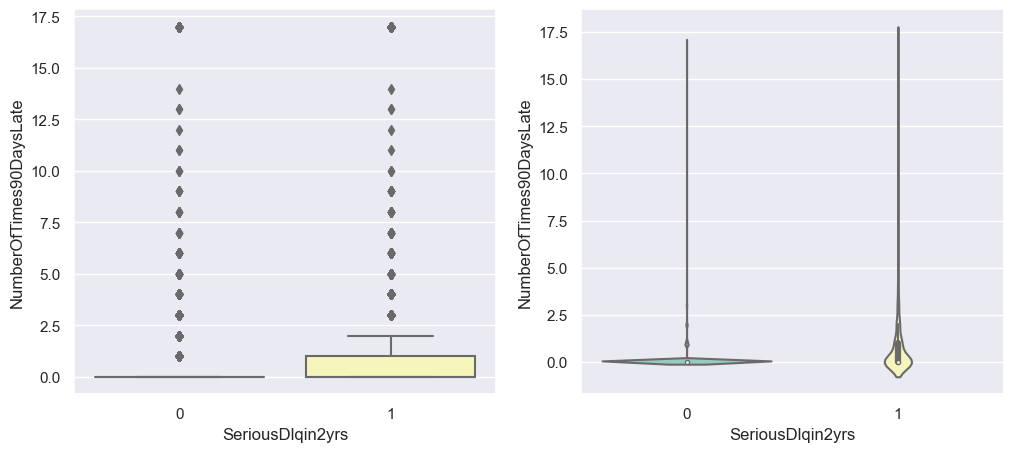

------------------------------------------------------------


In [47]:
cols = ['age','MonthlyIncome','DebtRatio',
        'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines',
        'RevolvingUtilizationOfUnsecuredLines','NumberOfDependents',
        'NumberOfTime30-59DaysPastDueNotWorse',
        'NumberOfTime60-89DaysPastDueNotWorse',
        'NumberOfTimes90DaysLate']

for col in cols:
    print(col)
    boxplot_violinplot('SeriousDlqin2yrs', col)
    print('-'*60)

- Age has no significance on the target variable though most of the customers are in the mid 50 who has serious delinquency in 2 years

- For MonthlyIncome & DebtRatio: More or less similar relationship when target is 0 or 1

- RevolvingUtilizationOfUnsecuredLines: It is expected that the higher the utlization ratio, the higher the default rate is. Let me look into that by plotting the utlization ratio to default rate

- For x-days behind due date all are similar  

## Feature Engineering

In [48]:
dataset = [new_train, new_test]

In [49]:
# Making combined features

for data in dataset:
    data['CombinedPastDue']     = data['NumberOfTime30-59DaysPastDueNotWorse'] + data['NumberOfTime60-89DaysPastDueNotWorse'] + data['NumberOfTimes90DaysLate']
    data['CombinedCreditLoans'] = data['NumberOfOpenCreditLinesAndLoans'] + data['NumberRealEstateLoansOrLines']
    
new_train.columns 

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs', 'CombinedPastDue',
       'CombinedCreditLoans'],
      dtype='object')

In [50]:
# Interaction of the features

for data in dataset:
    data['MonthlyIncomePerPerson'] = data['MonthlyIncome']/(data['NumberOfDependents']+1)
    # Above +1 because considering the borrower along with other dependents
    
    data['MonthlyDebt'] = data['MonthlyIncome']*data['DebtRatio']
    
    data['isRetired'] = np.where((data['age'] > 65), 1, 0)
    
    data['RevolvingLines'] = data['NumberOfOpenCreditLinesAndLoans']-data['NumberRealEstateLoansOrLines']
    
    data['hasRevolvingLines'] = np.where((data['RevolvingLines']>0),1,0)
    
    data['hasMultipleRealEstates'] = np.where((data['NumberRealEstateLoansOrLines']>=2),1,0)
    
    data['IsAlone'] = np.where((data['NumberOfDependents']==0),1,0)
    
new_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs', 'CombinedPastDue',
       'CombinedCreditLoans', 'MonthlyIncomePerPerson', 'MonthlyDebt',
       'isRetired', 'RevolvingLines', 'hasRevolvingLines',
       'hasMultipleRealEstates', 'IsAlone'],
      dtype='object')

In [51]:
new_train.shape, new_test.shape

((119542, 20), (29946, 20))

In [52]:
print(new_train['SeriousDlqin2yrs'].sum()*100/len(new_train))
print(new_test['SeriousDlqin2yrs'].sum()*100/len(new_test))

6.700573856887119
6.668670273158352


### **Tackling Class Imbalance Problem using:**

* Upsampling the minority class(default rate)
* Downsampling the majority class(non defaulters)
* SMOTE - synthethic sampling

In [53]:
new_train.SeriousDlqin2yrs.value_counts()

0    111532
1      8010
Name: SeriousDlqin2yrs, dtype: int64

In [54]:
new_test.SeriousDlqin2yrs.value_counts()

0    27949
1     1997
Name: SeriousDlqin2yrs, dtype: int64

In [55]:
df_train = new_train.drop(columns=['SeriousDlqin2yrs'],axis=1)
y_train = new_train['SeriousDlqin2yrs']

df_test = new_test.drop(columns=['SeriousDlqin2yrs'],axis=1)
y_test = new_test['SeriousDlqin2yrs']

#### **UpSampling**

In [56]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

df_majority = new_train[new_train['SeriousDlqin2yrs']==0]
df_minority = new_train[new_train['SeriousDlqin2yrs']==1]

# replacing the samples keeping 100000 as the defaulters to keep in 
# line with the non defaulters

df_minority_upsampled = resample(df_minority, replace=True, n_samples=100000, random_state=42)

df_upsampled = pd.concat([df_majority,df_minority_upsampled])

df_upsampled['SeriousDlqin2yrs'].value_counts()

0    111532
1    100000
Name: SeriousDlqin2yrs, dtype: int64

In [57]:
y_train_upsampled = df_upsampled['SeriousDlqin2yrs']

df_upsampled.drop(columns=['SeriousDlqin2yrs'],axis=1, inplace=True)

df_upsampled.shape, df_test.shape, y_train_upsampled.shape, y_test.shape

((211532, 19), (29946, 19), (211532,), (29946,))

#### **DownSampling**

In [58]:
# keeping 8000 as  non defaulters to keep in line with the defaulters
df_majority_downsampled = resample(df_majority, n_samples=8000, random_state=42)

df_downsampled = pd.concat([df_minority,df_majority_downsampled])

df_downsampled['SeriousDlqin2yrs'].value_counts()

1    8010
0    8000
Name: SeriousDlqin2yrs, dtype: int64

In [59]:
y_train_downsampled = df_downsampled['SeriousDlqin2yrs']

df_downsampled.drop(columns=['SeriousDlqin2yrs'], axis=1, inplace=True)

df_downsampled.shape, df_test.shape,\
y_train_downsampled.shape, y_test.shape

((16010, 19), (29946, 19), (16010,), (29946,))

#### **SMOTE**

In [60]:
smote = SMOTE(sampling_strategy = 'minority',k_neighbors = 2,random_state=42)

os_data_X, os_data_y = smote.fit_resample(df_train,y_train)

In [61]:
os_data_y.value_counts()

0    111532
1    111532
Name: SeriousDlqin2yrs, dtype: int64

In [62]:
print('Shape:', os_data_X.shape, '\nEvent Rate:',sum(os_data_y)/len(os_data_y))

# Now the event rate in the training dataset is 50%

Shape: (223064, 19) 
Event Rate: 0.5


In [63]:
# Making a copy of the dataframes so that tarnsformed df and original df is 
# separate to comapre results

os_data_X_tranformed  = os_data_X.copy()
df_test_transformed   = df_test.copy()

df_test_standaradized = df_test.copy()

df_downsampled_transformed = df_downsampled.copy()
df_upsampled_transformed   = df_upsampled.copy()

### Feature Scaling 

* **Scaling of the features so convergence of the model towards global minima can be achieved and training can be done faster**

* We will be using a couple of Feature Transformation techniques:
    * BoxCox Transformations
    * Standaradization
    
* **

- In many statistical techniques, we assume that the errors are normally distributed. This assumption allows us to construct confidence intervals and conduct hypothesis tests. 

- **Box-Cox transformation** is a transformation of non-normal dependent variables into a normal shape. Box-Cox transformation helps to improve the predictive power of your analytical model. 

- At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve.

#### Scaling features using BoxCox Transformations

In [64]:
from scipy import stats, special
from scipy.stats import skew

def SkewMeasure(df):
    nonObjectColList = df.dtypes[df.dtypes != 'object'].index
    
    skewM = df[nonObjectColList].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
    
    skewM = pd.DataFrame({'skew':skewM})
    
    return skewM[abs(skewM)>0.5].dropna()

In [65]:
SkewMeasure(os_data_X_tranformed)

skew
MonthlyIncome                         146.968611
MonthlyIncomePerPerson                105.345969
MonthlyDebt                            90.058100
DebtRatio                              87.067428
NumberOfTime60-89DaysPastDueNotWorse    8.583851
NumberOfTimes90DaysLate                 8.078678
CombinedPastDue                         8.062667
NumberOfTime30-59DaysPastDueNotWorse    5.085588
NumberRealEstateLoansOrLines            3.790846
isRetired                               2.563314
NumberOfDependents                      1.428809
hasMultipleRealEstates                  1.355296
RevolvingLines                          1.254642
CombinedCreditLoans                     1.103831
NumberOfOpenCreditLinesAndLoans         1.087161
RevolvingUtilizationOfUnsecuredLines    0.807936
hasRevolvingLines                      -4.240216

In [66]:
skewM = SkewMeasure(os_data_X_tranformed)

for i in skewM.index:
    os_data_X_tranformed[i] = special.boxcox1p(os_data_X_tranformed[i],0.15) #lambda = 0.15
    df_test_transformed[i]  = special.boxcox1p(df_test_transformed[i],0.15) #lambda = 0.15

SkewMeasure(os_data_X_tranformed)

skew
NumberOfTime60-89DaysPastDueNotWorse  4.678528
NumberOfTimes90DaysLate               3.733055
isRetired                             2.563314
NumberOfTime30-59DaysPastDueNotWorse  2.097797
DebtRatio                             2.094686
MonthlyDebt                           1.908265
CombinedPastDue                       1.877200
hasMultipleRealEstates                1.355296
NumberOfDependents                    0.797379
NumberRealEstateLoansOrLines          0.696784
NumberOfOpenCreditLinesAndLoans      -0.563962
CombinedCreditLoans                  -0.605089
MonthlyIncomePerPerson               -1.251531
MonthlyIncome                        -1.944274
hasRevolvingLines                    -4.240216

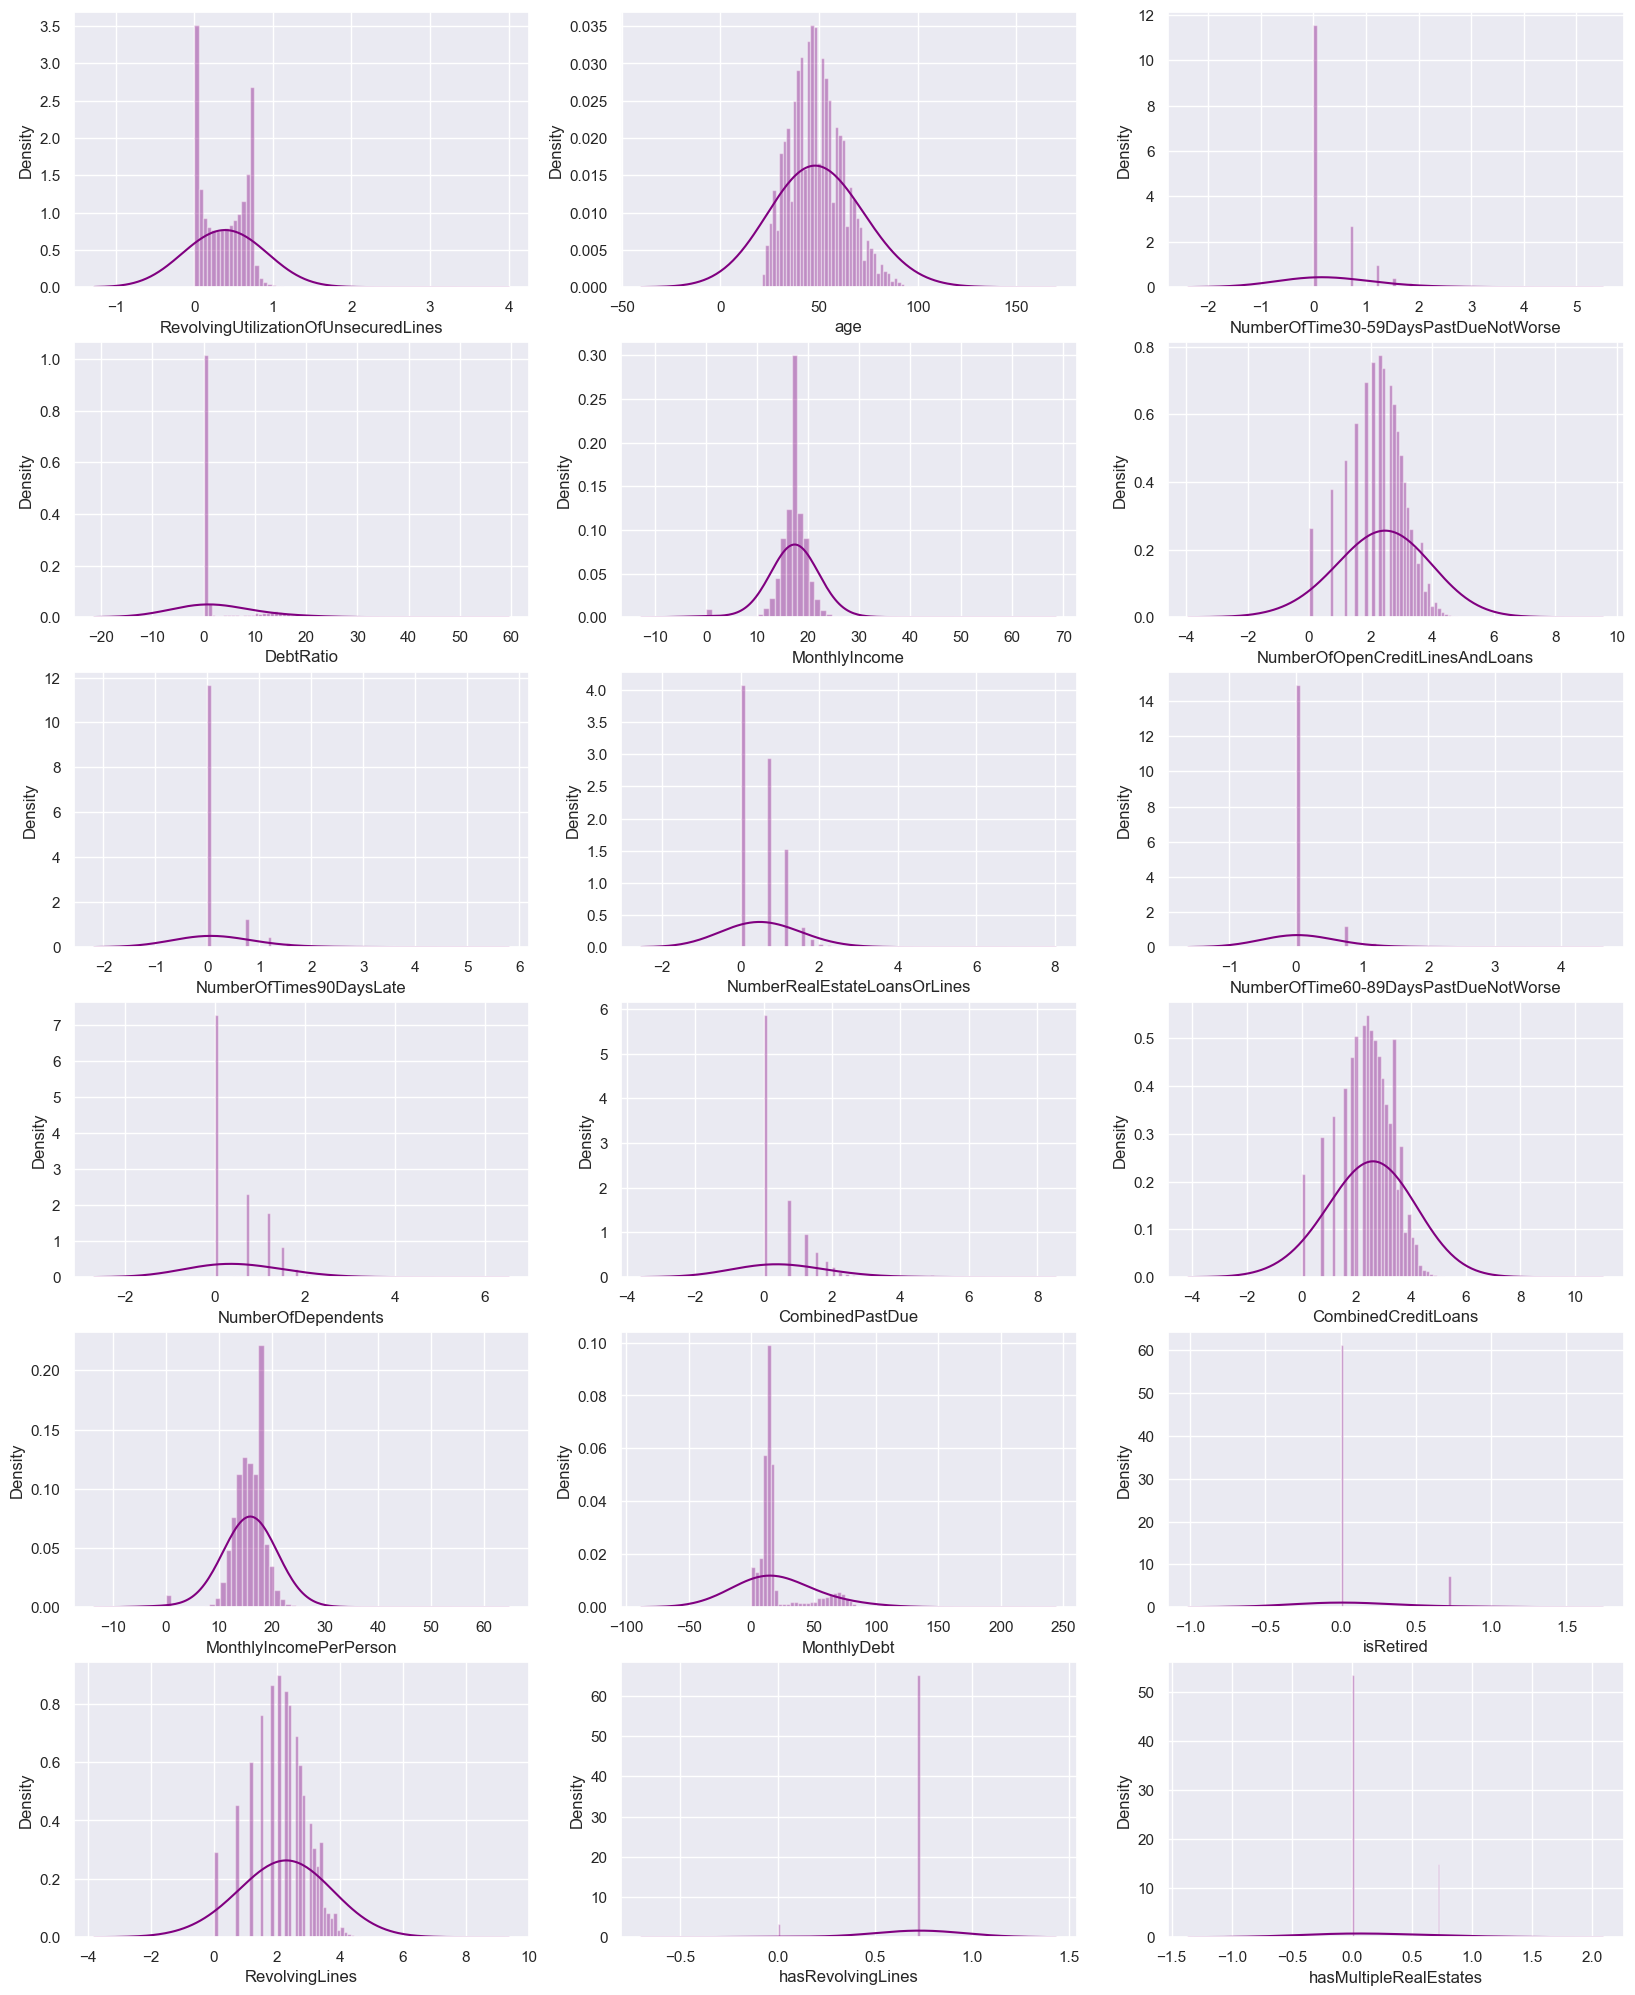

In [67]:
columnList = list(df_test_transformed.columns)

fig = plt.figure(figsize=[20,25])

for col,i in zip(columnList,range(1,19)):
    axes = fig.add_subplot(6,3,i)
    sns.distplot(os_data_X_tranformed[col],ax=axes, kde_kws={'bw':1.5}, color='purple')

plt.show();

- **Skewness is reduced and now the graphs are looking good**

In [68]:
df_train_transformed = df_train.copy()

skewM = SkewMeasure(df_train)

for i in skewM.index:
    df_train_transformed[i] = special.boxcox1p(df_train_transformed[i],0.15) #lambda = 0.15

#### Standaradization

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(os_data_X)

X_train_scaled = scaler.transform(os_data_X) 
X_test_scaled = scaler.transform(df_test)

In [70]:
scaler = StandardScaler().fit(df_upsampled_transformed)

X_train_scaled_upsampled = scaler.transform(df_upsampled_transformed) 
X_test_scaled_upsampled = scaler.transform(df_test_standaradized)

In [71]:
scaler = StandardScaler().fit(df_downsampled_transformed)

X_train_scaled_downsampled = scaler.transform(df_downsampled_transformed) 
X_test_scaled_downsampled = scaler.transform(df_test_standaradized)

## Modelling

* **Training the model :**
    * **
    * We will be training the model using different algorithms 
    * We wil also be comparing the results using transformed dataset and the original dataset
    * We will check and compare on which algorithms transformations works and on which not.
    * We will be doing Cross Validation and will see if the model performance is fluctuating using the statistical measures such as mean and standarad deviation 
    
* **

* **Predicting the customers from the test dataset and comapring with the true values from the test dataset using different evaluation metrics will give us which model to go for and which model is performing the best**

* **

* **We will also be evaluating our model on different metrics and why some metrics might fail in our case study which is one of the most popular metric to evaluate a model performance**

* **

* **Some common evaluation metric you will be seeing across all modeling algorithms are:**
    * **Precision** - *How good a model is in predicting the events*
        * True Positive/(True Positive + False Positives)
        
    * **Recall** - *How good a model is able to capture relevant* events(Coverage)
        * True Positive/(True Positive + False Negatives)
        
    * **F1 Score** - *Harmonic mean between Precision and Recall, this metric penalized either one of the lower scorer metric so that trade off can be maintained*
    
    * **Area Under the Curve & ROC** - *How good a model is able to differentiate between the classes*
    
        * It is plotted as False Positive Rate on the x-axis and True Positive Rate on the y-axis  using different thresholds.
        * The more the area or the line it is above straight diagonal line, the better is model performance as comapred to randomly predicting the classes
        
* **

* **We will be comapring the different modeling techniques AUC results to see which ones are performing better as compared to others**

* **
* **We will be tuning hyper parameters of the models to achieve better results and see how tuning increases performance if it does**

In [72]:
# Importing ML algorithms
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, accuracy_score,\
                            confusion_matrix, roc_curve, auc,\
                            classification_report, recall_score,\
                            precision_score, f1_score, roc_auc_score,\
                            auc,roc_curve, precision_recall_curve

# Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.datasets import make_classification
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.feature_selection import RFECV
from imblearn.pipeline import Pipeline


# TensorFlow
import tensorflow as tf
import keras
import keras.backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models
from keras import layers

### Neural Network

In [73]:
# import keras.backend as K

# custom metrics

def precision(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
    precision = true_positives/(predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives/(possible_positives + K.epsilon())
    return recall

In [74]:
def fit_model(data, labels, test_data, test_label, epochs, batch_size):
    
    n_inputs = data.shape[1]
    model = keras.Sequential()
    
    model.add(layers.Dense(16, activation ='relu', input_shape =(n_inputs, )))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(32,activation = 'relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(1,activation ='sigmoid'))
    
    model_file_name = 'MLP_predict_default_case_study.hdf5'
    
    ckpt = ModelCheckpoint(model_file_name, monitor='val_precision',
                           save_best_only=True, mode='max')
    
    early = EarlyStopping(monitor="val_recall", mode="max", patience=15)

    model.compile(optimizer = 'adam',
                 loss= 'binary_crossentropy',
                 metrics = [precision,recall])
    
    history = model.fit(data,
                       labels,
                       epochs=epochs,
                       batch_size=batch_size,
                       callbacks=[ckpt, early],
                       validation_data=(test_data,test_label))
    
    return model

#### <a href="https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f#:~:text=The%20macro%2Daveraged%20F1%20score,regardless%20of%20their%20support%20values.&text=The%20value%20of%200.58%20we,score%20in%20our%20classification%20report">Micro, Macro & Weighted Averages of F1 Score, Clearly Explained</a>

In [79]:
def compute_precisions_thresolds(data, labels, test_data, test_label, 
                                 epochs, batch_size):
    
    trained_model = fit_model(data, labels, test_data, test_label,
                              epochs=epochs, batch_size=batch_size)
    
    y_test_pred   = trained_model.predict(test_data)
    
    # 'macro' scoring gives equal importance to both the majority & minority class
    
    # The macro-averaged F1 score (or macro F1 score) is computed using the arithmetic mean (aka unweighted mean) 
    # of all the per-class F1 scores.
    # This method treats all classes equally regardless of their support values.
    
    P_macro = []; P_micro = [];\
    R_macro = []; R_micro = [];\
    F1_macro = []; F1_micro = [];\
    cut_off = []; metrics = pd.DataFrame()
    
    threshold_list = [0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96]
    
    for thres in threshold_list:
        cut_off.append(thres)
        
        y_test_pred_new = [1 if el>thres else 0 for el in y_test_pred]
        
        prec_macro = round(precision_score(test_label, y_test_pred_new, pos_label=1, average='macro'),2)
        P_macro.append(prec_macro)
        
        prec_micro = round(precision_score(test_label, y_test_pred_new, pos_label=1, average='micro'),2)
        P_micro.append(prec_micro)
        
        rec_macro = round(recall_score(test_label, y_test_pred_new, pos_label=1,average='macro'),2)
        R_macro.append(rec_macro)
        
        rec_micro = round(recall_score(test_label, y_test_pred_new, pos_label=1,average='micro'),2)
        R_micro.append(rec_micro)
        
        f1_macro = round(f1_score(test_label, y_test_pred_new, average='macro'),2)
        F1_macro.append(f1_macro)
        
        f1_micro = round(f1_score(test_label, y_test_pred_new, average='micro'),2)
        F1_micro.append(f1_micro)
        
    metrics = pd.DataFrame({'Threshold' : cut_off, 'Precision Macro' : P_macro,\
                            'Precision Micro' : P_micro,'Recall Macro' : R_macro,\
                            'Recall Micro' : R_micro,'F1 Score Macro' : F1_macro,\
                            'F1 Score Micro' : F1_micro})
    
    return metrics.sort_values(by=['Threshold'], ascending=False)

- **Appling Neural Network model on Box Cox transformed dataset**

In [80]:
box_cox_metrics = compute_precisions_thresolds(os_data_X_tranformed, os_data_y, 
                                               df_test_transformed, y_test,
                                               epochs=15, batch_size=128)

Epoch 1/15
1743/1743 [==============================] - 3s 1ms/step - loss: 0.6403 - precision: 0.6681 - recall: 0.6767 - val_loss: 0.5217 - val_precision: 0.1817 - val_recall: 0.7580
Epoch 2/15
1743/1743 [==============================] - 2s 1ms/step - loss: 0.4740 - precision: 0.7638 - recall: 0.7985 - val_loss: 0.4403 - val_precision: 0.1816 - val_recall: 0.7496
Epoch 3/15
1743/1743 [==============================] - 2s 1ms/step - loss: 0.4466 - precision: 0.7790 - recall: 0.8090 - val_loss: 0.3768 - val_precision: 0.2035 - val_recall: 0.6773
Epoch 4/15
1743/1743 [==============================] - 2s 1ms/step - loss: 0.4345 - precision: 0.7848 - recall: 0.8144 - val_loss: 0.4511 - val_precision: 0.1745 - val_recall: 0.7760
Epoch 5/15
1743/1743 [==============================] - 2s 1ms/step - loss: 0.4267 - precision: 0.7864 - recall: 0.8216 - val_loss: 0.3985 - val_precision: 0.1973 - val_recall: 0.7069
Epoch 6/15
1743/1743 [==============================] - 2s 1ms/step - loss: 0.42

In [81]:
box_cox_metrics

Threshold  Precision Macro  Precision Micro  Recall Macro  Recall Micro  \
9       0.96             0.78             0.93          0.50          0.93   
8       0.95             0.79             0.93          0.50          0.93   
7       0.90             0.75             0.93          0.51          0.93   
6       0.80             0.73             0.93          0.55          0.93   
5       0.70             0.70             0.93          0.63          0.93   
4       0.60             0.65             0.90          0.71          0.90   
3       0.50             0.59             0.81          0.74          0.81   
2       0.40             0.57             0.72          0.75          0.72   
1       0.30             0.56             0.66          0.74          0.66   
0       0.25             0.56             0.63          0.73          0.63   

   F1 Score Macro  F1 Score Micro  
9            0.49            0.93  
8            0.49            0.93  
7            0.51            0.93  
6            0.58            0.93  
5            0.66            0.93  
4            0.67            0.90  
3            0.61            0.81  
2            0.55            0.72  
1            0.52            0.66  
0            0.49            0.63

- **Applying Neural Network on Standardized dataset**

In [82]:
standardized_metrics = compute_precisions_thresolds(X_train_scaled, os_data_y, 
                                                    X_test_scaled, y_test,epochs=15, 
                                                    batch_size=128)

Epoch 1/15
1743/1743 [==============================] - 3s 1ms/step - loss: 0.4764 - precision: 0.7638 - recall: 0.8098 - val_loss: 0.4285 - val_precision: 0.1878 - val_recall: 0.7346
Epoch 2/15
1743/1743 [==============================] - 2s 1ms/step - loss: 0.3887 - precision: 0.8107 - recall: 0.8408 - val_loss: 0.3375 - val_precision: 0.2297 - val_recall: 0.6431
Epoch 3/15
1743/1743 [==============================] - 2s 1ms/step - loss: 0.3536 - precision: 0.8324 - recall: 0.8369 - val_loss: 0.3404 - val_precision: 0.2312 - val_recall: 0.6297
Epoch 4/15
1743/1743 [==============================] - 2s 1ms/step - loss: 0.3444 - precision: 0.8406 - recall: 0.8335 - val_loss: 0.3221 - val_precision: 0.2481 - val_recall: 0.6003
Epoch 5/15
1743/1743 [==============================] - 2s 1ms/step - loss: 0.3385 - precision: 0.8454 - recall: 0.8309 - val_loss: 0.3368 - val_precision: 0.2329 - val_recall: 0.6344
Epoch 6/15
1743/1743 [==============================] - 2s 1ms/step - loss: 0.33

In [83]:
standardized_metrics

Threshold  Precision Macro  Precision Micro  Recall Macro  Recall Micro  \
9       0.96             0.65             0.93          0.50          0.93   
8       0.95             0.69             0.93          0.50          0.93   
7       0.90             0.75             0.93          0.51          0.93   
6       0.80             0.70             0.93          0.53          0.93   
5       0.70             0.66             0.92          0.66          0.92   
4       0.60             0.64             0.89          0.72          0.89   
3       0.50             0.60             0.84          0.74          0.84   
2       0.40             0.58             0.78          0.75          0.78   
1       0.30             0.57             0.72          0.75          0.72   
0       0.25             0.57             0.68          0.74          0.68   

   F1 Score Macro  F1 Score Micro  
9            0.48            0.93  
8            0.48            0.93  
7            0.50            0.93  
6            0.54            0.93  
5            0.66            0.92  
4            0.67            0.89  
3            0.62            0.84  
2            0.59            0.78  
1            0.55            0.72  
0            0.53            0.68

- **Applying Neural Network on Original Standaradized dataset**

In [84]:
scaler = StandardScaler().fit(df_train)

df_train_scaled = scaler.transform(df_train) 
df_test_scaled = scaler.transform(df_test)

In [85]:
base_metrics = compute_precisions_thresolds(df_train_scaled, y_train,
                                            df_test_scaled, y_test, 
                                            epochs=10, batch_size=128)

Epoch 1/10
934/934 [==============================] - 2s 2ms/step - loss: 0.2262 - precision: 0.2813 - recall: 0.0532 - val_loss: 0.1889 - val_precision: 0.3301 - val_recall: 0.0523
Epoch 2/10
934/934 [==============================] - 1s 1ms/step - loss: 0.1915 - precision: 0.3607 - recall: 0.0679 - val_loss: 0.1859 - val_precision: 0.3380 - val_recall: 0.0563
Epoch 3/10
934/934 [==============================] - 1s 1ms/step - loss: 0.1874 - precision: 0.4237 - recall: 0.0891 - val_loss: 0.1852 - val_precision: 0.3959 - val_recall: 0.0750
Epoch 4/10
934/934 [==============================] - 1s 1ms/step - loss: 0.1852 - precision: 0.4618 - recall: 0.0997 - val_loss: 0.1848 - val_precision: 0.2108 - val_recall: 0.0335
Epoch 5/10
934/934 [==============================] - 1s 1ms/step - loss: 0.1841 - precision: 0.4786 - recall: 0.1087 - val_loss: 0.1845 - val_precision: 0.2774 - val_recall: 0.0474
Epoch 6/10
934/934 [==============================] - 1s 1ms/step - loss: 0.1836 - precisi

In [86]:
base_metrics

Threshold  Precision Macro  Precision Micro  Recall Macro  Recall Micro  \
9       0.96             0.47             0.93          0.50          0.93   
8       0.95             0.47             0.93          0.50          0.93   
7       0.90             0.47             0.93          0.50          0.93   
6       0.80             0.47             0.93          0.50          0.93   
5       0.70             0.88             0.93          0.50          0.93   
4       0.60             0.75             0.93          0.51          0.93   
3       0.50             0.77             0.94          0.57          0.94   
2       0.40             0.73             0.93          0.62          0.93   
1       0.30             0.70             0.93          0.67          0.93   
0       0.25             0.68             0.92          0.69          0.92   

   F1 Score Macro  F1 Score Micro  
9            0.48            0.93  
8            0.48            0.93  
7            0.48            0.93  
6            0.48            0.93  
5            0.49            0.93  
4            0.51            0.93  
3            0.60            0.94  
2            0.66            0.93  
1            0.68            0.93  
0            0.69            0.92

- **Applying Neural Network on Upsampled dataset**

In [87]:
upsampled_metrics = compute_precisions_thresolds(X_train_scaled_upsampled, y_train_upsampled, 
                                                 df_test_standaradized, y_test, 
                                                 epochs=10, batch_size=128)

Epoch 1/10
1653/1653 [==============================] - 3s 1ms/step - loss: 0.5076 - precision: 0.7605 - recall: 0.7282 - val_loss: 390477.0000 - val_precision: 0.0616 - val_recall: 0.2181
Epoch 2/10
1653/1653 [==============================] - 2s 1ms/step - loss: 0.4766 - precision: 0.7733 - recall: 0.7639 - val_loss: 366237.8750 - val_precision: 0.0576 - val_recall: 0.1850
Epoch 3/10
1653/1653 [==============================] - 2s 1ms/step - loss: 0.4717 - precision: 0.7745 - recall: 0.7641 - val_loss: 353980.3125 - val_precision: 0.0561 - val_recall: 0.1767
Epoch 4/10
1653/1653 [==============================] - 2s 1ms/step - loss: 0.4690 - precision: 0.7768 - recall: 0.7649 - val_loss: 322718.5312 - val_precision: 0.0551 - val_recall: 0.1713
Epoch 5/10
1653/1653 [==============================] - 2s 1ms/step - loss: 0.4673 - precision: 0.7766 - recall: 0.7649 - val_loss: 314992.3438 - val_precision: 0.0556 - val_recall: 0.1758
Epoch 6/10
1653/1653 [==============================] -

In [88]:
upsampled_metrics

Threshold  Precision Macro  Precision Micro  Recall Macro  Recall Micro  \
9       0.96             0.49             0.75          0.48          0.75   
8       0.95             0.49             0.75          0.48          0.75   
7       0.90             0.49             0.75          0.48          0.75   
6       0.80             0.49             0.75          0.48          0.75   
5       0.70             0.49             0.75          0.48          0.75   
4       0.60             0.49             0.75          0.48          0.75   
3       0.50             0.49             0.75          0.48          0.75   
2       0.40             0.49             0.75          0.48          0.75   
1       0.30             0.49             0.75          0.48          0.75   
0       0.25             0.49             0.75          0.48          0.75   

   F1 Score Macro  F1 Score Micro  
9            0.47            0.75  
8            0.47            0.75  
7            0.47            0.75  
6            0.47            0.75  
5            0.47            0.75  
4            0.47            0.75  
3            0.47            0.75  
2            0.47            0.75  
1            0.47            0.75  
0            0.47            0.75

- **Applying Neural Network on Downsampled dataset**

In [89]:
downsampled_metrics = compute_precisions_thresolds(X_train_scaled_downsampled, 
                                                   y_train_downsampled, 
                                                   df_test_standaradized, 
                                                   y_test, epochs=10, 
                                                   batch_size=128)

Epoch 1/10
126/126 [==============================] - 1s 4ms/step - loss: 0.6215 - precision: 0.6913 - recall: 0.5909 - val_loss: 104096.8594 - val_precision: 0.0663 - val_recall: 0.9756
Epoch 2/10
126/126 [==============================] - 0s 3ms/step - loss: 0.5445 - precision: 0.7457 - recall: 0.7330 - val_loss: 57113.5273 - val_precision: 0.0720 - val_recall: 0.6010
Epoch 3/10
126/126 [==============================] - 0s 3ms/step - loss: 0.5204 - precision: 0.7677 - recall: 0.7433 - val_loss: 1514.9938 - val_precision: 0.0826 - val_recall: 0.2147
Epoch 4/10
126/126 [==============================] - 0s 3ms/step - loss: 0.5079 - precision: 0.7744 - recall: 0.7527 - val_loss: 1628.8138 - val_precision: 0.0824 - val_recall: 0.0983
Epoch 5/10
126/126 [==============================] - 0s 3ms/step - loss: 0.5045 - precision: 0.7755 - recall: 0.7590 - val_loss: 850.3478 - val_precision: 0.0889 - val_recall: 0.0826
Epoch 6/10
126/126 [==============================] - 0s 3ms/step - loss:

In [90]:
downsampled_metrics

Threshold  Precision Macro  Precision Micro  Recall Macro  Recall Micro  \
9       0.96             0.52             0.91          0.51          0.91   
8       0.95             0.52             0.91          0.51          0.91   
7       0.90             0.52             0.91          0.51          0.91   
6       0.80             0.52             0.91          0.51          0.91   
5       0.70             0.52             0.91          0.51          0.91   
4       0.60             0.51             0.91          0.51          0.91   
3       0.50             0.51             0.91          0.51          0.91   
2       0.40             0.51             0.91          0.51          0.91   
1       0.30             0.51             0.91          0.51          0.91   
0       0.25             0.51             0.91          0.51          0.91   

   F1 Score Macro  F1 Score Micro  
9            0.51            0.91  
8            0.51            0.91  
7            0.51            0.91  
6            0.51            0.91  
5            0.51            0.91  
4            0.51            0.91  
3            0.51            0.91  
2            0.50            0.91  
1            0.51            0.91  
0            0.50            0.91

#### Key TakeAways from using Neural Networks

* It can be cleary seen that Deep learning models require scaling of the features so that error can be minimised when features are nearly of the same scale so that bakcpropogation of errors can be there which results in better optimization
* **

* No effect on Neural Network Models whether samples are downsampled or upsampled but that is not the case when synthetic sampling is used
* **

* Results are more or less the same using Box Cox transformations and Standaradization 

### Trying ML Models

* **Logistic Regression**
* **Random Forest**
* **XGBoost**
* **Light GBM**

In [91]:
def cal_score(y_test, y_pred): 
    cm = confusion_matrix(y_test, y_pred)
    
    prec_scr_macro = precision_score(y_test, y_pred, average='macro')*100
    prec_scr_micro = precision_score(y_test, y_pred, average='micro')*100
    
    rec_scr_macro = recall_score(y_test ,y_pred, average='macro')*100
    rec_scr_micro = recall_score(y_test ,y_pred, average='micro')*100
    
    f1_scr_macro = f1_score(y_test, y_pred, average='macro')*100 
    f1_scr_micro = f1_score(y_test, y_pred, average='micro')*100 
    
    return prec_scr_macro, prec_scr_micro,\
           rec_scr_macro, rec_scr_micro,\
           f1_scr_macro, f1_scr_micro,\
           cm

In [92]:
def metrics_calculation(classifier, training_data, testing_data, 
                        training_label, testing_label):
    
    result = []
    cols = ['Mean Accuracy', 'Accuracy deviation',\
            'Precision Macro', 'Precision Micro',\
            'Recall Macro','Recall Micro',\
            'F1 Score Macro', 'F1 Score Micro',\
            'Confusion Matrix']
    
    crs_val = cross_val_score(classifier, training_data, training_label, cv=5)
    
    mean_acc = round(np.mean(crs_val),3)
    std_acc  = round(np.std(crs_val),3)
    
    classifier.fit(training_data, training_label)
    predictions = classifier.predict(testing_data)
    
    prec_scr_macro, prec_scr_micro,\
    rec_scr_macro, rec_scr_micro,\
    f1_scr_macro, f1_scr_micro, cm = cal_score(testing_label, predictions)
    
    result.extend([mean_acc, std_acc,\
                   prec_scr_macro, prec_scr_micro,\
                   rec_scr_macro, rec_scr_micro,\
                   f1_scr_macro, f1_scr_micro, 
                   cm])
    
    series_result = pd.Series(data=result, index=cols)
    return series_result

In [93]:
clf_dict = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Logistic Regression' : LogisticRegression(random_state=42),
    'Light GBM' : LGBMClassifier(random_state=42)
}

* **Evolution of Tree Based Algorithms and going towards XGboost** -
* **

* **Decision Tree** : A graphical representation of possible solutions to a decision based on certain conditions.


* **Bagging** : Bootstrap aggregating or Bagging is a ensemble meta-algorithm combining predictions from multiple decision trees through a majority voting mechanism.


* **Random Forest** : Bagging based algorithm where only a subset of features are selected at random to build a forest or collection of decision trees.


* **Boosting** : Models are built sequentially by minizing the errors from previous models while increasing(boosting) influence of high-performing models.


* **Gradient Boosting** : It employs gradient descent algorithm to minimize errors in sequential models.


* **XGBoost** : Optimized Gradient Boosting algorithm through parallel processing, tree-pruning,handling missing values and regularization to avoid overfitting/bias.

- **Training Box Cox transformed dataset using ML algorithms**

In [94]:
frame = {}
for key in clf_dict:

    classifier_result = metrics_calculation(clf_dict[key], os_data_X_tranformed, df_test_transformed, os_data_y, y_test)
    frame[key]    = classifier_result
        
box_cox_smote_df = pd.DataFrame(frame)
box_cox_smote_df

Random Forest  \
Mean Accuracy                              0.935   
Accuracy deviation                         0.019   
Precision Macro                        62.787138   
Precision Micro                        89.290723   
Recall Macro                           68.410339   
Recall Micro                           89.290723   
F1 Score Macro                         64.861829   
F1 Score Micro                         89.290723   
Confusion Matrix    [[25854, 2095], [1112, 885]]   

                                         XGBoost  \
Mean Accuracy                              0.883   
Accuracy deviation                         0.024   
Precision Macro                        59.854668   
Precision Micro                        85.213384   
Recall Macro                           70.457246   
Recall Micro                           85.213384   
F1 Score Macro                         62.108777   
F1 Score Micro                         85.213384   
Confusion Matrix    [[24451, 3498], [930, 1067]]   

                             Logistic Regression                     Light GBM  
Mean Accuracy                                0.8                         0.857  
Accuracy deviation                         0.007                         0.018  
Precision Macro                        58.538732                     59.677538  
Precision Micro                        79.332799                      82.83911  
Recall Macro                           74.420931                     73.904749  
Recall Micro                           79.332799                      82.83911  
F1 Score Macro                         59.293769                     61.617424  
F1 Score Micro                         79.332799                      82.83911  
Confusion Matrix    [[22384, 5565], [624, 1373]]  [[23537, 4412], [727, 1270]]

- **Training Standaradized dataset using ML algorithms**

In [95]:
frame_std = {}
for key in clf_dict:

    classifier_result_std = metrics_calculation(clf_dict[key], X_train_scaled, X_test_scaled, os_data_y, y_test)
    frame_std[key]    = classifier_result_std
        
standardized_smote_df = pd.DataFrame(frame_std)
standardized_smote_df

Random Forest  \
Mean Accuracy                              0.935   
Accuracy deviation                         0.019   
Precision Macro                        62.773053   
Precision Micro                        89.230615   
Recall Macro                           68.587375   
Recall Micro                           89.230615   
F1 Score Macro                          64.89535   
F1 Score Micro                         89.230615   
Confusion Matrix    [[25827, 2122], [1103, 894]]   

                                         XGBoost  \
Mean Accuracy                              0.883   
Accuracy deviation                         0.025   
Precision Macro                        59.956964   
Precision Micro                        85.503907   
Recall Macro                           70.217661   
Recall Micro                           85.503907   
F1 Score Macro                         62.241088   
F1 Score Micro                         85.503907   
Confusion Matrix    [[24555, 3394], [947, 1050]]   

                             Logistic Regression                     Light GBM  
Mean Accuracy                               0.83                         0.856  
Accuracy deviation                         0.018                         0.018  
Precision Macro                        59.519508                     59.689098  
Precision Micro                        84.351833                     83.036132  
Recall Macro                           70.948883                     73.638321  
Recall Micro                           84.351833                     83.036132  
F1 Score Macro                         61.631729                     61.669869  
F1 Score Micro                         84.351833                     83.036132  
Confusion Matrix    [[24152, 3797], [889, 1108]]  [[23612, 4337], [743, 1254]]

- **Training Original dataset with using hyperparameter which is balancing minority class as per the majority class**

In [96]:
'''
Here, class_weight = {0:1, 1:10} is used to balance the minority class, which says 
                                class 1 is given 10 times more weight than class 0
                                
Similarly in XGBoost & LightGBM:
the parameter scale_pos_weight = 10, does the same with the minority class.
'''


clf_dict_balanced = {
            'Random Forest': RandomForestClassifier(random_state=42, 
                                                    class_weight = {0:1, 1:10}),

            'XGBoost': XGBClassifier(random_state=42, 
                                     scale_pos_weight = 10),

            'Logistic Regression' : LogisticRegression(random_state=42, 
                                                       class_weight = {0:1, 1:10}),

            'Light GBM' : LGBMClassifier(random_state=42, 
                                         scale_pos_weight = 10)
}

In [97]:
frame_balanced = {}
for key in clf_dict_balanced:

    classifier_result_balanced = metrics_calculation(clf_dict_balanced[key], df_train, df_test, y_train, y_test)
    frame_balanced[key]    = classifier_result_balanced
        
balanced_df = pd.DataFrame(frame_balanced)
balanced_df

Random Forest                       XGBoost  \
Mean Accuracy                             0.935                         0.866   
Accuracy deviation                          0.0                         0.001   
Precision Macro                       74.282694                     61.604048   
Precision Micro                       93.488279                     85.928004   
Recall Macro                          56.895917                     74.536611   
Recall Micro                          93.488279                     85.928004   
F1 Score Macro                        59.853718                     64.433248   
F1 Score Micro                        93.488279                     85.928004   
Confusion Matrix    [[27703, 246], [1704, 293]]  [[24506, 3443], [771, 1226]]   

                           Logistic Regression                     Light GBM  
Mean Accuracy                            0.929                         0.851  
Accuracy deviation                       0.002                         0.002  
Precision Macro                      48.350661                     61.426655  
Precision Micro                      92.326187                     84.715822  
Recall Macro                         49.717254                     76.607298  
Recall Micro                         92.326187                     84.715822  
F1 Score Macro                       48.478376                     64.142619  
F1 Score Micro                       92.326187                     84.715822  
Confusion Matrix    [[27637, 312], [1986, 11]]  [[24026, 3923], [654, 1343]]

* **XGBoost and Light GBM are performing better in terms of Recall & Light GBM whereas Random Forest in Precision**

* **Training Scaled oiginal dataset with using hyperparameter which is balancing minority class as per the majority class**

In [98]:
frame_balanced_scaled= {}

for key in clf_dict_balanced:
    classifier_result_balanced_scaled = metrics_calculation(clf_dict_balanced[key], 
                                                            df_train_transformed, df_test_transformed, 
                                                            y_train, y_test)
    frame_balanced_scaled[key]    = classifier_result_balanced_scaled
        
balanced_df_scaled = pd.DataFrame(frame_balanced_scaled)
balanced_df_scaled

Random Forest                       XGBoost  \
Mean Accuracy                             0.935                         0.866   
Accuracy deviation                          0.0                         0.001   
Precision Macro                       74.123954                     61.601176   
Precision Micro                       93.474922                     85.924664   
Recall Macro                          56.726021                     74.534822   
Recall Micro                          93.474922                     85.924664   
F1 Score Macro                        59.619149                     64.429475   
F1 Score Micro                        93.474922                     85.924664   
Confusion Matrix    [[27706, 243], [1711, 286]]  [[24505, 3444], [771, 1226]]   

                             Logistic Regression                     Light GBM  
Mean Accuracy                              0.855                         0.851  
Accuracy deviation                         0.002                         0.002  
Precision Macro                        61.110808                     61.426655  
Precision Micro                        84.936219                     84.715822  
Recall Macro                           75.051472                     76.607298  
Recall Micro                           84.936219                     84.715822  
F1 Score Macro                         63.752073                     64.142619  
F1 Score Micro                         84.936219                     84.715822  
Confusion Matrix    [[24164, 3785], [726, 1271]]  [[24026, 3923], [654, 1343]]

* **Logistic Regression metrics are changed while all other model metrics remain same**

* Hence, Logistic Regression algorithm requires scaling of features whereas tree based doesn't

#### **Plotting ROC AUC for the ML models for the transformed dataset**

In [99]:
models = [
            {'label': 'Random Forest',
             'model': RandomForestClassifier(random_state=42)},
            {'label' : 'XGBoost',
             'model' : XGBClassifier(random_state=42)},
            {'label' : 'Logistic Regression',
             'model' : LogisticRegression(random_state=42)},
            {'label' : 'Light GBM',
             'model' : LGBMClassifier(random_state=42)}
        ]

In [100]:
def plot_multiplt_rocauc(models, train_X, train_y ,dev_X, dev_y):
    
    for m in models:
        model = m['model']   
        model.fit(train_X, train_y)
        
        y_pred = model.predict(dev_X)
        pred   = model.predict_proba(dev_X)
        pred_new = [i[1] for i in pred]
        
        fpr, tpr, thresholds = roc_curve(dev_y, pred_new)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, 
                 label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
    
    plt.plot([0, 1], [0, 1],'r--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()   # Display
    
    return 

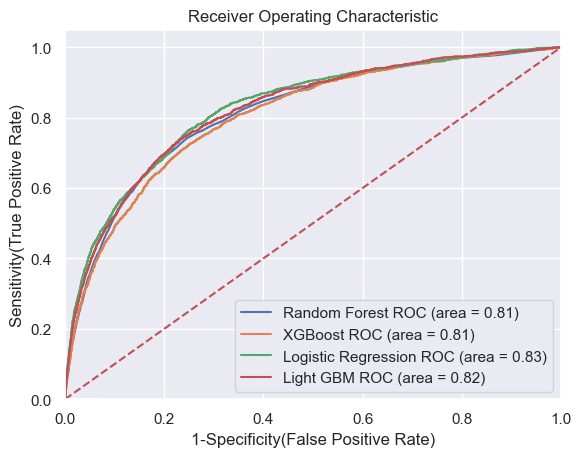

In [101]:
plot_multiplt_rocauc(models, os_data_X_tranformed, os_data_y, 
                     df_test_transformed, y_test)

- AUC of all the models are on a similar scale except the XGBoost model which is 0.1 on a higher side

- AUC of XGBoost & LightGBM are performing better than the others

* **Key takeaways:**

    * Tree Based model doesn't require scaling of the features

    * Statistical - Logistic Regression requires scaling of the features

    * ***Upsampling of the Minority Class, Downsampling of the Majority Class and SMOTE sampling results are not better as compared to hyperparamater turning on using class weights in the model itself***
    
* **We will be proceeding with the original dataset without scaling of the featues but using class weights in the model itself**
    

#### **Feature Importance**

* We will be plotting top features by importance of all the ML algorithms

* we will be plotting Logistic Regression features by correlation

In [102]:
def plot_feature_importances(model, data):
    plt.figure(figsize=(8,6))
    n_features = data.shape[1]
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

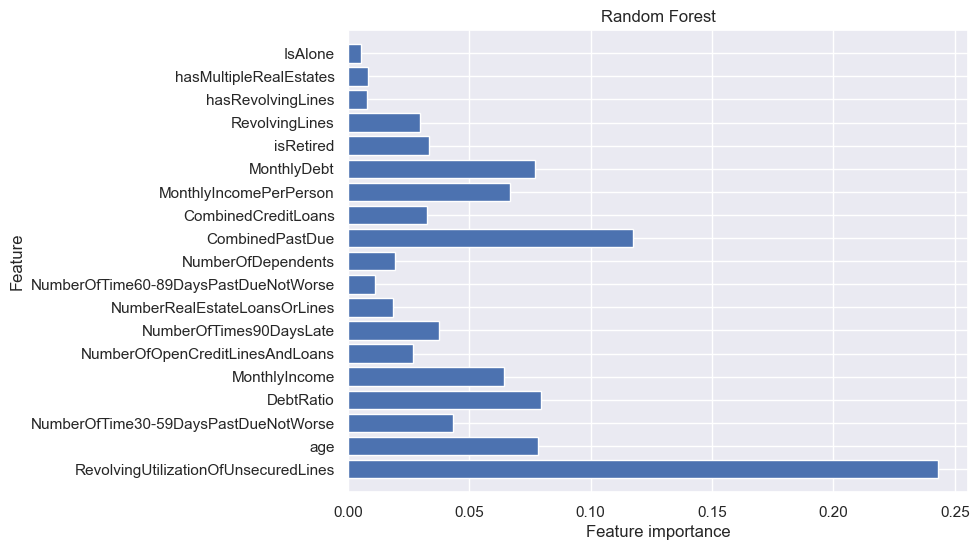

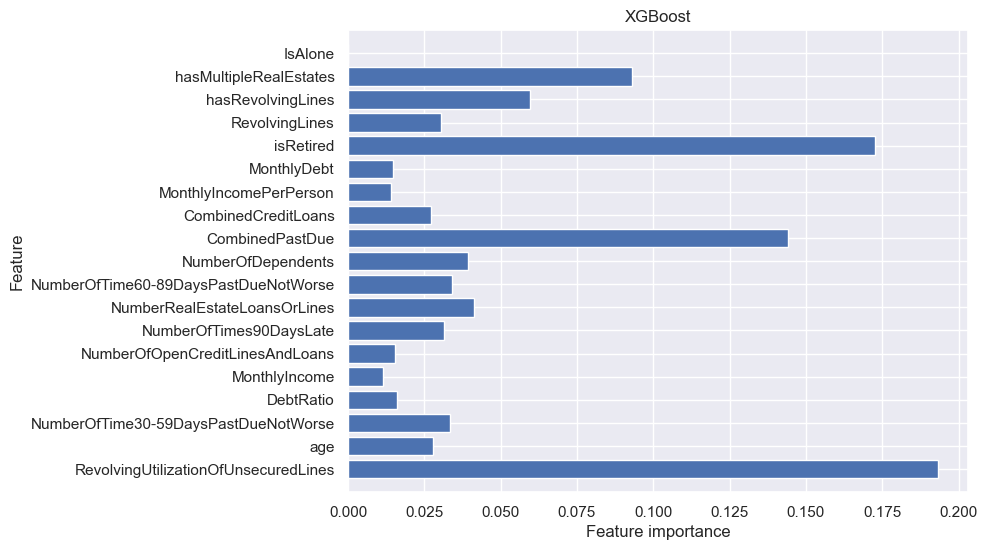

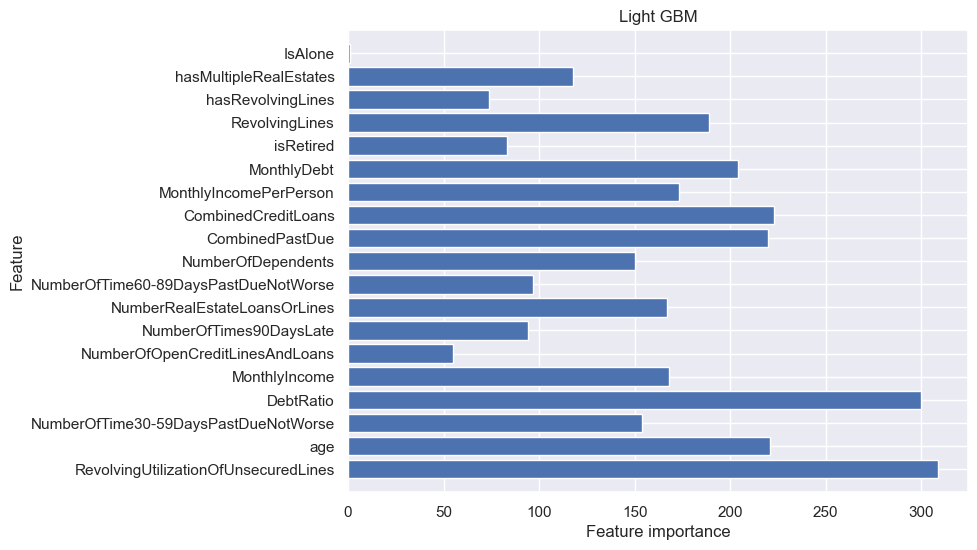

In [103]:
for key in clf_dict.keys():
    if key =='Logistic Regression':
        continue
    else:
        # print('Model is ', key)
        plot_feature_importances(clf_dict[key], os_data_X_tranformed)
        plt.title(key)

* In all ML models, ratio of amount owed to the credit limit is the top feature followed by Combined Past Due which is the summation of all dues by a borrower
* **

* In Light GBM model, others features are also contributing to a greater extent

In [104]:
logreg = LogisticRegression(random_state=42)
logreg.fit(os_data_X_tranformed, os_data_y)

coeff_df = pd.DataFrame(os_data_X_tranformed.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

Feature  Correlation
0   RevolvingUtilizationOfUnsecuredLines     3.860068
10                       CombinedPastDue     2.439351
11                   CombinedCreditLoans     0.966680
12                MonthlyIncomePerPerson     0.267885
9                     NumberOfDependents     0.255385
5        NumberOfOpenCreditLinesAndLoans     0.170881
13                           MonthlyDebt     0.053543
1                                    age    -0.002357
7           NumberRealEstateLoansOrLines    -0.165866
3                              DebtRatio    -0.232468
4                          MonthlyIncome    -0.357140
6                NumberOfTimes90DaysLate    -0.415471
17                hasMultipleRealEstates    -0.656142
15                        RevolvingLines    -0.866965
18                               IsAlone    -0.874647
8   NumberOfTime60-89DaysPastDueNotWorse    -0.982915
16                     hasRevolvingLines    -1.299109
2   NumberOfTime30-59DaysPastDueNotWorse    -1.427896
14                             isRetired    -2.009145

* Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability)

### Feature Selection using RFECV

We will be using RFECV on Random Forest to remove correlated features because they might be providing the same information

In [105]:
def RFE(model, training_data, training_label):
    rfc = model
    rfecv = RFECV(estimator=rfc, step=1, 
                  cv=StratifiedKFold(5), scoring='roc_auc',
                  n_jobs=-1)
    
    rfecv.fit(training_data, training_label)

    print('Optimal number of features: {}'.format(rfecv.n_features_))
    training_data_rfe = training_data.drop(training_data.columns[np.where(rfecv.support_ == False)[0]], axis=1)
    
    plt.figure(figsize=(16, 9))
    plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
    plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
    plt.show()
    
    dset = pd.DataFrame()
    dset['attr'] = training_data.columns
    dset['importance'] = rfecv.estimator_.feature_importances_

    dset = dset.sort_values(by='importance', ascending=False)


    plt.figure(figsize=(16, 14))
    plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
    plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
    plt.xlabel('Importance', fontsize=14, labelpad=20)
    plt.show()
    
    return training_data_rfe.columns.tolist()

In [106]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

rfecv = RFECV(estimator=rfc, step=1, 
              cv=StratifiedKFold(5), scoring='roc_auc',
              n_jobs=-1)

rfecv.fit(os_data_X_tranformed, os_data_y)

print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 19


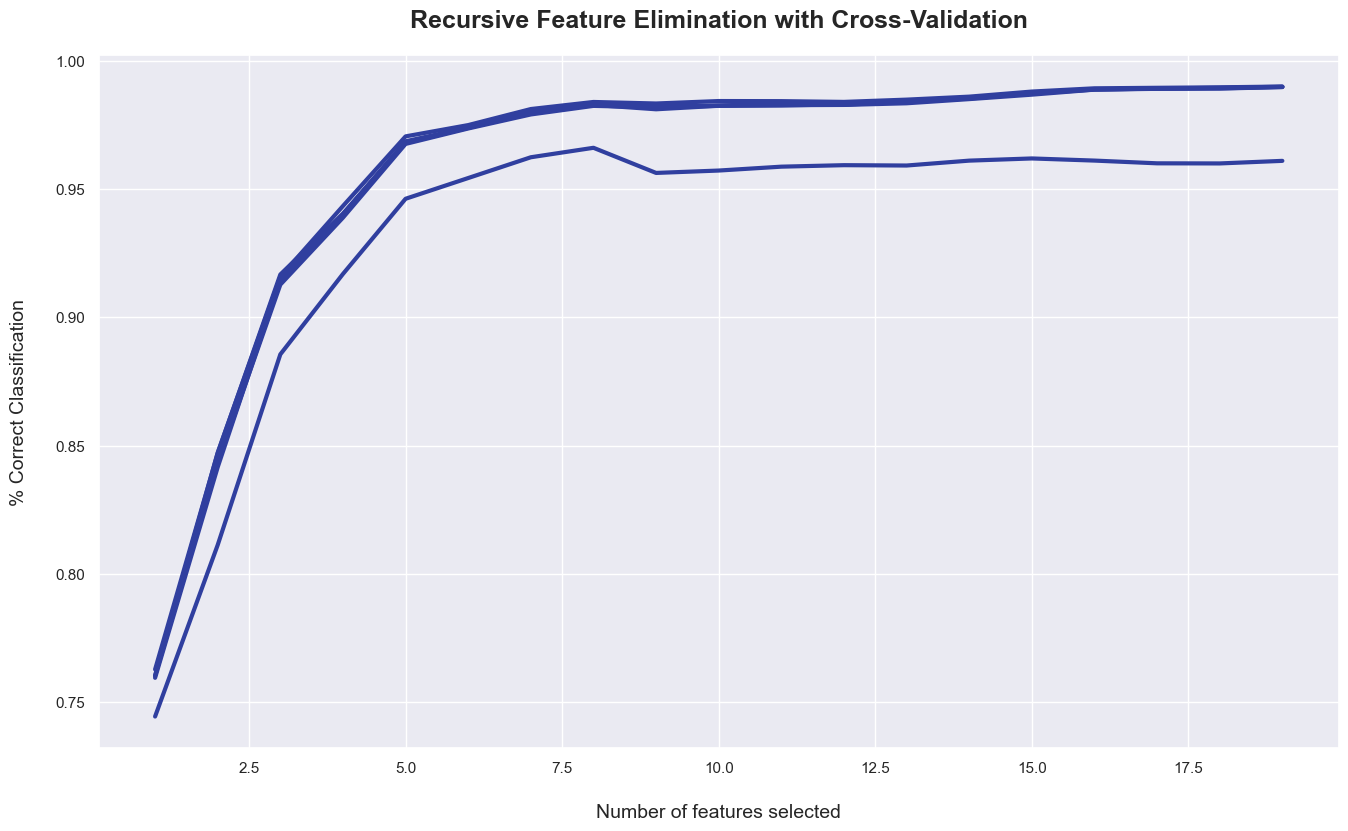

In [107]:
plt.figure(figsize=(16, 9))

plt.title('Recursive Feature Elimination with Cross-Validation', 
          fontsize=18, fontweight='bold', pad=20)

plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)

for key, value in rfecv.cv_results_.items():
    if key in ['mean_test_score', 'std_test_score']:
        pass
    else:
        plt.plot(range(1, len(value) + 1), value, color='#303F9F', linewidth=3)
    

plt.show();

In [108]:
print(np.where(rfecv.support_ == False)[0])

os_data_X_tranformed_rfe = os_data_X_tranformed.drop(os_data_X_tranformed.columns[np.where(rfecv.support_ == False)[0]], axis=1)
os_data_X_tranformed_rfe.columns

[]


Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CombinedPastDue', 'CombinedCreditLoans',
       'MonthlyIncomePerPerson', 'MonthlyDebt', 'isRetired', 'RevolvingLines',
       'hasRevolvingLines', 'hasMultipleRealEstates', 'IsAlone'],
      dtype='object')

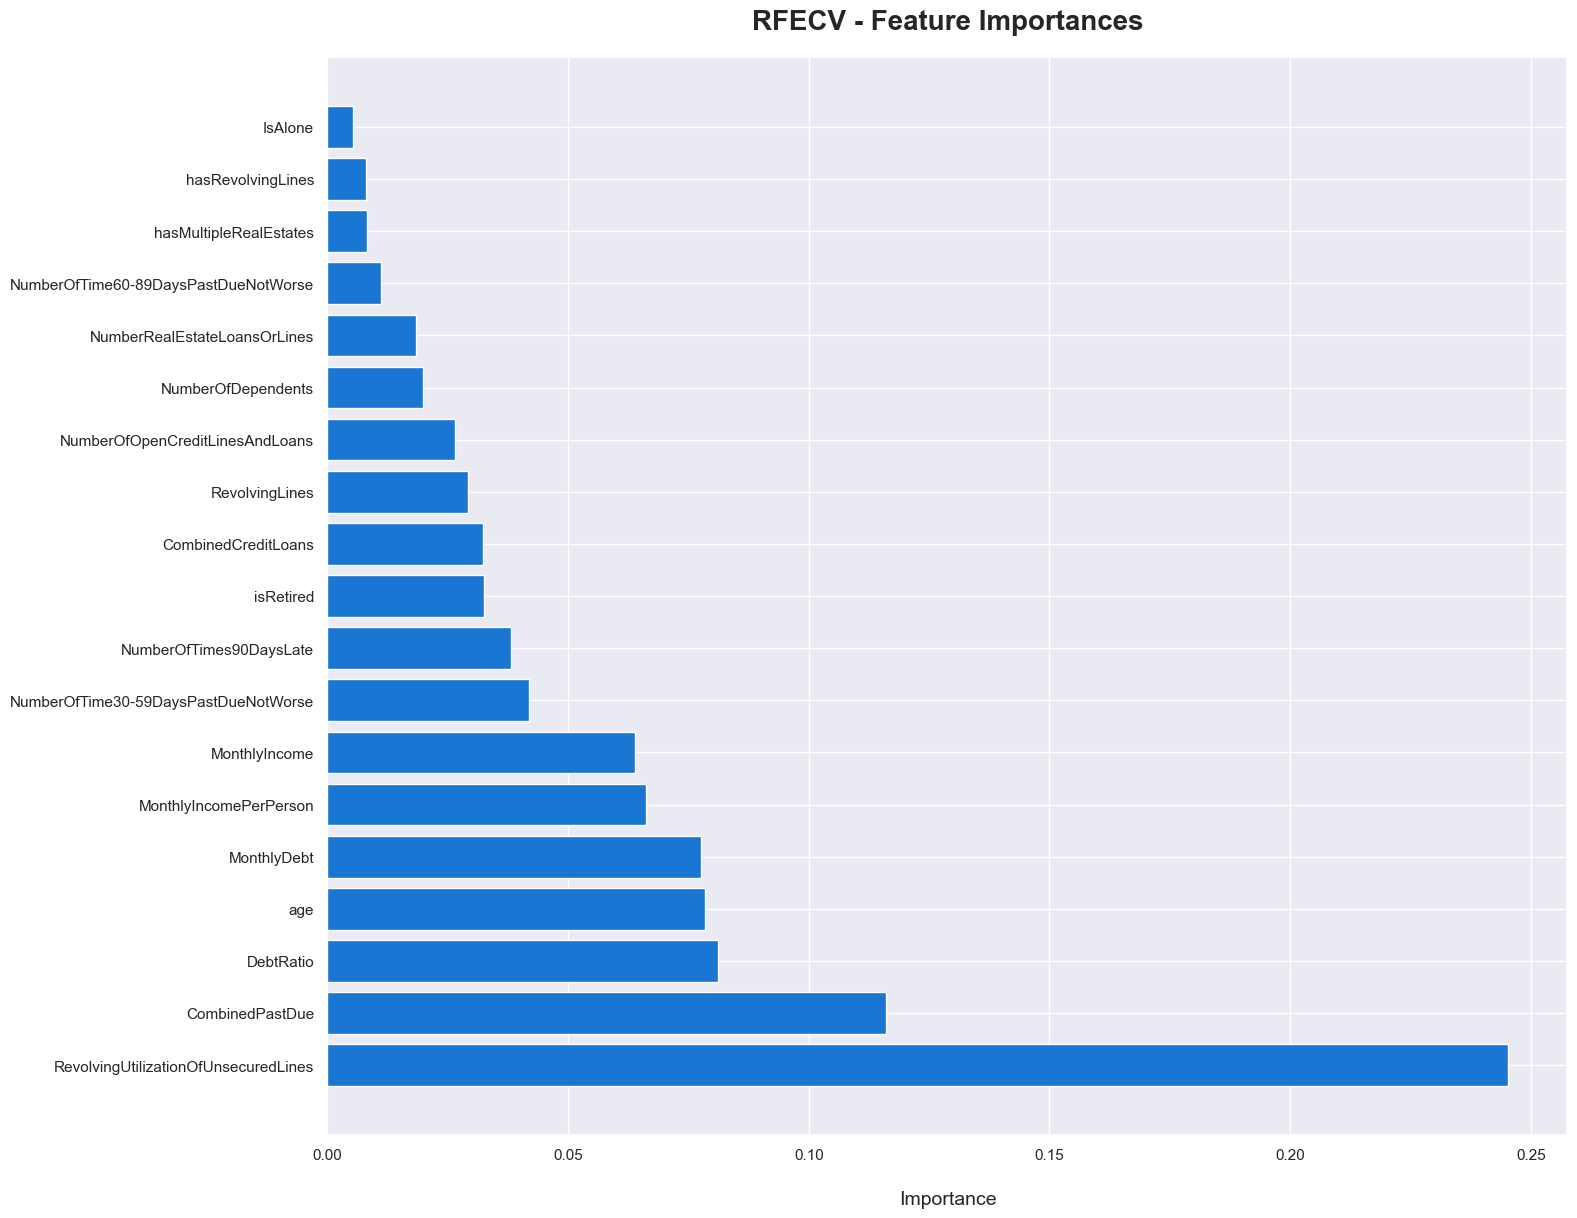

In [109]:
dset = pd.DataFrame()
dset['attr'] = os_data_X_tranformed.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show();

- Since our optimal performance is with the complete features and no feature is eliminated, we wil be proceeding with the complete Feature Engineered inputs

### HyperParamter Tuning 

- for the Random Forest, XGBoost, and LightGBM

* Now we will be using Metrics such as Precision, Recall, F1 Score on class 1 only

* Previously  **macro** and  **micro** were used to give idea how these 2 separate metrics are calculated

In [110]:
def hyperparameter_tuning(classifier, training_dataset, 
                          test_dataset, training_label, test_label):
    
    result = []
    cols = ['Precision', 'Recall', 'F1 Score', 'Confusion Matrix']
    
    model_name = {}
    class_str = str(classifier)
    
    if 'Random' in class_str:
        param_grid={"n_estimators":[27,36,100,200],
                    "max_depth":[5,7,9,15],
                    "min_samples_leaf":[2,4,6,8]}
        
        model = GridSearchCV(classifier, param_grid = param_grid, 
                             cv=StratifiedKFold(5),
                             n_jobs = -1)
        
        model.fit(training_dataset, training_label)
        
        best_est_model = model.best_estimator_
        model_name[class_str] = best_est_model
        
        best_est_model.fit(training_dataset, training_label)
        y_pred = best_est_model.predict(test_dataset)

    elif 'XG' in class_str:
        model_name = {}
        parameters = {'n_estimators': [100, 200], 
                      'max_depth': [3, 5, 8], 
                      'gamma' : [0.25,0.5,1],
                      'reg_alpha': [0.1, 0.25, 0.5],
                      'reg_lambda': [0.5,1,1.15],
                      'scale_pos_weight' : [8,10,12,15]}
        
        model = GridSearchCV(classifier, parameters, 
                             scoring="neg_log_loss", 
                             cv = StratifiedKFold(5), 
                             n_jobs = -1, verbose = 2)
        
        model.fit(training_dataset, training_label)
        
        best_est_model = model.best_estimator_
        model_name[class_str] = best_est_model
        best_est_model.fit(training_dataset, training_label)
        y_pred = best_est_model.predict(test_dataset)
        
    else:
        model_name = {}
        param_grid = {'n_estimators': [100,250,400],
                      'min_split_gain' : [0.25,0.45,0.7],
                      'max_depth': [4,7,10],
                      'subsample': [0.65,0.85],
                      'colsample_bytree': [0.45,0.65,0.85],
                      'reg_lambda': [0.5,1,3,5],
                      'num_leaves' : [30,50,70],
                      'min_data_in_leaf' : [100,400,600]}
        
        model = GridSearchCV(estimator = classifier, param_grid=param_grid, 
                             cv = StratifiedKFold(5), n_jobs = -1, verbose=2)
        
        model.fit(training_dataset, training_label)
        
        best_est_model = model.best_estimator_
        model_name[class_str] = best_est_model
        best_est_model.fit(training_dataset, training_label)
        y_pred = best_est_model.predict(test_dataset)
        
    # prec_scr, rec_scr, f1_scr, cm = cal_score(test_label, y_pred)
    
    prec_scr_macro, prec_scr_micro,\
    rec_scr_macro, rec_scr_micro,\
    f1_scr_macro, f1_scr_micro, cm = cal_score(test_label, y_pred)
    
    # result.extend([prec_scr, rec_scr, f1_scr, cm])
    result.extend([prec_scr_macro, rec_scr_macro, f1_scr_macro, cm])
    series_result = pd.Series(data=result, index=cols)   
    
    return series_result, model_name

In [111]:
# frame_hyperparamater = {} 
# model_params = []

# for key in clf_dict:
#     if key == 'Logistic Regression':
#         continue
        
#     print(key)
#     hyperparamater_result, model_paramters = hyperparameter_tuning(clf_dict[key], 
#                                                                    df_train, df_test, 
#                                                                    y_train, y_test)
#     frame_hyperparamater[key] = hyperparamater_result
#     model_params.append(model_paramters)
        
# tuned_df = pd.DataFrame(frame_hyperparamater)

# model_params

In [192]:
clf_dict_balanced = {'Random Forest': RandomForestClassifier(max_depth=15, min_samples_leaf=8, 
                                                             n_estimators=200, random_state=42, 
                                                             class_weight={0:1,1:10}),
                     
                     'XGBoost': XGBClassifier(gamma=1, max_depth=8, n_estimators=200, 
                                              random_state=42, reg_alpha=0.5, 
                                              reg_lambda=1.15, scale_pos_weight=10),
                     
                     'Logistic Regression': LogisticRegression(random_state=42, 
                                                               class_weight={0:1,1:10}),
                     
                     'Light GBM': LGBMClassifier(colsample_bytree=0.65, max_depth=4, 
                                                 min_data_in_leaf=400, 
                                                 min_split_gain=0.25, num_leaves=70, 
                                                 random_state=42, reg_lambda=5, 
                                                 subsample=0.65, scale_pos_weight=10)
                    }

In [193]:
frame_balanced = {}
for key in clf_dict_balanced:

    classifier_result_balanced = metrics_calculation(clf_dict_balanced[key], df_train, df_test, y_train, y_test)
    frame_balanced[key]    = classifier_result_balanced
        
balanced_df = pd.DataFrame(frame_balanced)
balanced_df

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400


Random Forest  \
Mean Accuracy                                0.9   
Accuracy deviation                         0.001   
Precision Macro                        64.934348   
Precision Micro                        89.728177   
Recall Macro                           73.108423   
Recall Micro                           89.728177   
F1 Score Macro                         67.779079   
F1 Score Micro                         89.728177   
Confusion Matrix    [[25793, 2156], [920, 1077]]   

                                         XGBoost         Logistic Regression  \
Mean Accuracy                              0.903                       0.929   
Accuracy deviation                         0.002                       0.002   
Precision Macro                        63.270193                   48.350661   
Precision Micro                        89.594604                   92.326187   
Recall Macro                           68.596385                   49.717254   
Recall Micro                           89.594604                   92.326187   
F1 Score Macro                         65.293502                   48.478376   
F1 Score Micro                         89.594604                   92.326187   
Confusion Matrix    [[25944, 2005], [1111, 886]]  [[27637, 312], [1986, 11]]   

                                       Light GBM  
Mean Accuracy                              0.845  
Accuracy deviation                         0.002  
Precision Macro                        61.453374  
Precision Micro                        84.448674  
Recall Macro                           77.254632  
Recall Micro                           84.448674  
F1 Score Macro                         64.143645  
F1 Score Micro                         84.448674  
Confusion Matrix    [[23912, 4037], [620, 1377]]

- **Plotting ROC AUC for the ML models for the original dataset**

In [112]:
models_balanced = [
    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(max_depth=15, min_samples_leaf=8, n_estimators=200, random_state=42, class_weight={0:1,1:10})
    },
    {
    'label' : 'XGBoost',
    'model' : XGBClassifier(gamma=1, max_depth=8, n_estimators=200, random_state=42, reg_alpha=0.5, reg_lambda=1.15, scale_pos_weight=10)
    },
    {
    'label' : 'Logistic Regression',
    'model' : LogisticRegression(random_state=42, class_weight={0:1,1:10})
    },
    {
    'label' : 'Light GBM',
    'model' : LGBMClassifier(colsample_bytree=0.65, max_depth=4, min_data_in_leaf=400, min_split_gain=0.25, num_leaves=70, random_state=42, reg_lambda=5, subsample=0.65, scale_pos_weight=10)
    }
]

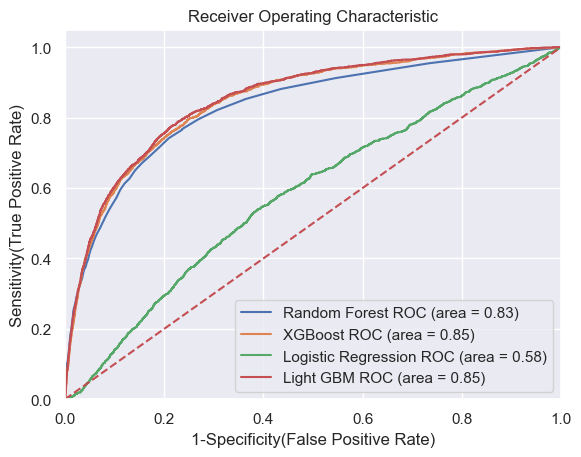

In [113]:
plot_multiplt_rocauc(models,df_train,y_train, df_test, y_test)

- We will be going with the **Light GBM model** as it is performing better than the other models

In [114]:
model_lgb = LGBMClassifier(colsample_bytree=0.65, max_depth=4, 
                           min_data_in_leaf=400, min_split_gain=0.25, 
                           num_leaves=70, random_state=42, 
                           reg_lambda=5, subsample=0.65, 
                           scale_pos_weight=10)

model_lgb.fit(df_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400


LGBMClassifier(colsample_bytree=0.65, max_depth=4, min_data_in_leaf=400,
               min_split_gain=0.25, num_leaves=70, random_state=42,
               reg_lambda=5, scale_pos_weight=10, subsample=0.65)

In [115]:
y_pred = model_lgb.predict(df_test)

df_test['predictions'] = y_pred

In [117]:
predict_model_lgb = lambda x: model_lgb.predict_proba(x).astype(float)

## Feature Importance and Model Explaination using SHAP and LIME

* **Why Interpretability in Machine Learning model is needed:**
    * **
    
    * Fairness - We might be interested in trends of the feature wrt to target variable.
    
    * Checking causality of features & Debugging models - We might be interested in what pattern among the features model is capturing.
    
    * Regulations -Sometimes regulatory bodies need answers taken on model inference

* Explaining the model performance using SHAP so that black box model can become transparent one.

* **We will be looking at the model transparency using SHAP at global level and LIME at a local level**

* **

* The collective SHAP values can show how much each predictor contributes, either positively or negatively, to the target variable. This is like the variable importance plot but it is able to show the positive or negative relationship for each variable with the target.  

### SHAP(SHapely Additive exPlainations)

Variable Importance Plot — Global Interpretability

In [118]:
# drop the predictions column here
df_test = df_test.drop(columns = ['predictions'])

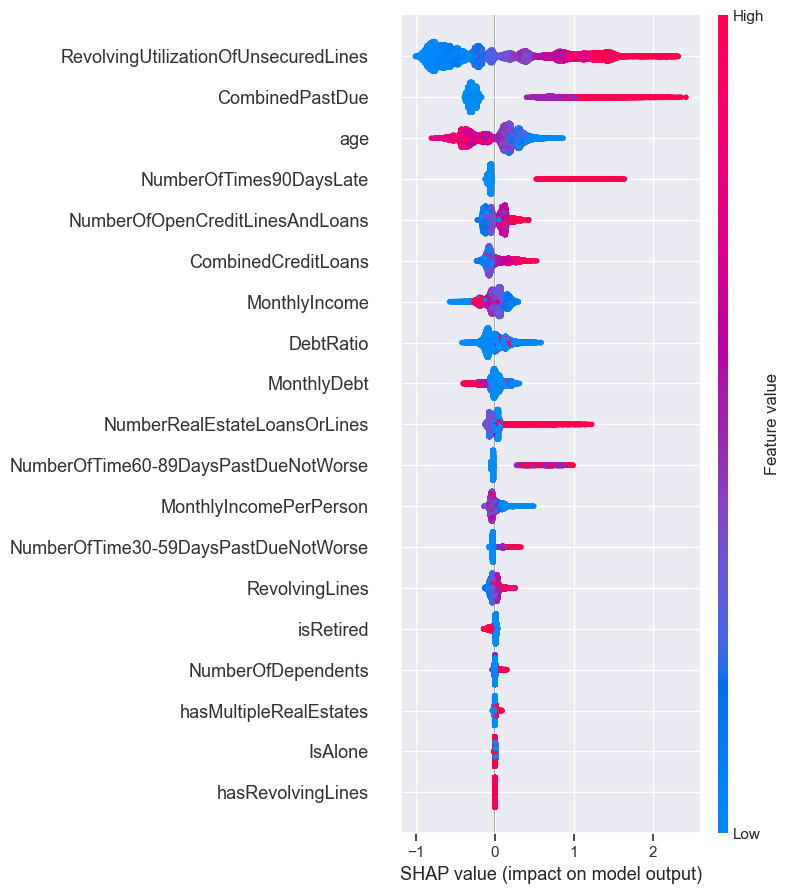

In [121]:
import shap

X_importance = df_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(model_lgb)
shap_values = explainer.shap_values(X_importance)

# Plot summary_plot
shap.summary_plot(shap_values[1], X_importance)

* Feature importance: Variables are ranked in descending order.
* **

* Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

* **

* Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
* **

* Correlation: A high level of the “RevolvingUtilizationOfUnsecuredLines” and "Debt Ratio" has a high and positive impact on the defaulting. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say the “age” is equally correlated with the target variable and non-target variable which might not give any good performance.

* "Monthly Income" effect is comparitvely low toward prediting values and even the effect is alos low

#### SHAP Dependence Plot — Global Interpretability

- The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic or more complex.

- The function automatically includes another variable that your chosen variable interacts most with.

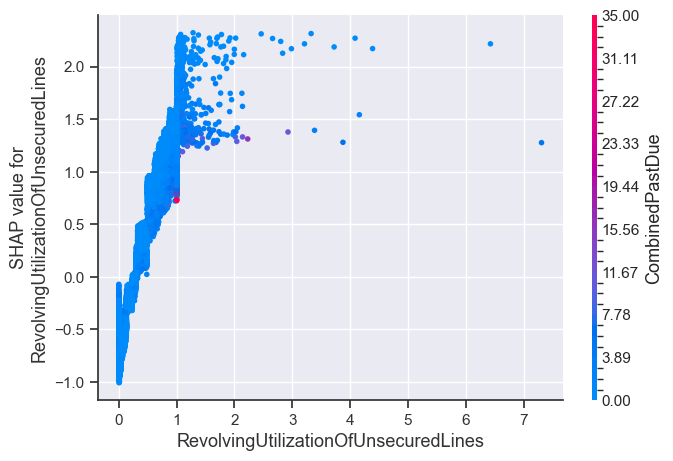

In [122]:
shap.dependence_plot("RevolvingUtilizationOfUnsecuredLines", 
                     shap_values[1], X_importance)

- The following plot shows there is an very little linear and a bit of positive trend between “RevolvingUtilizationOfUnsecuredLines” and the target variable, and “RevolvingUtilizationOfUnsecuredLines” does not interact with “CombinedPastDue”.

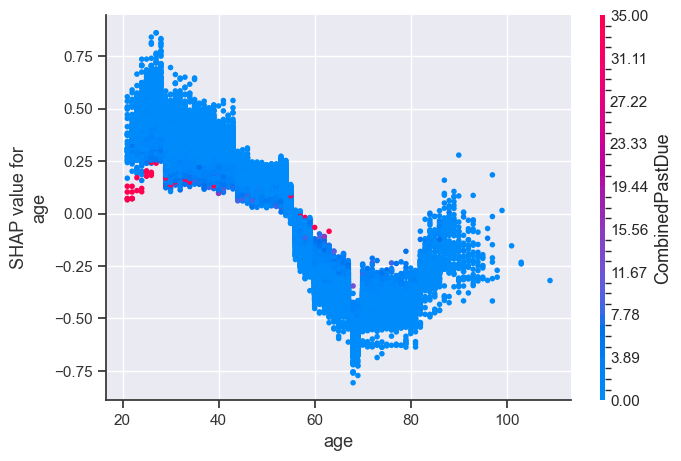

In [123]:
shap.dependence_plot("age", shap_values[1], X_importance)

- The following plot shows there is an good linear and a negative trend between “age” and the target variable, and “age” interacts with “CombinedPastDue” not so much.

### LIME(Local Interpretable Model agnostic Explanations)

* **If we want to understand how a single prediction was made for a given observation. This is where we use the LIME technique which stands for local interpretable model agnostic explanations.**

In [127]:
from lime.lime_tabular import LimeTabularExplainer

# creating the explainer function
explainer = LimeTabularExplainer(df_test.values, mode="classification", 
                                 feature_names=df_test.columns)

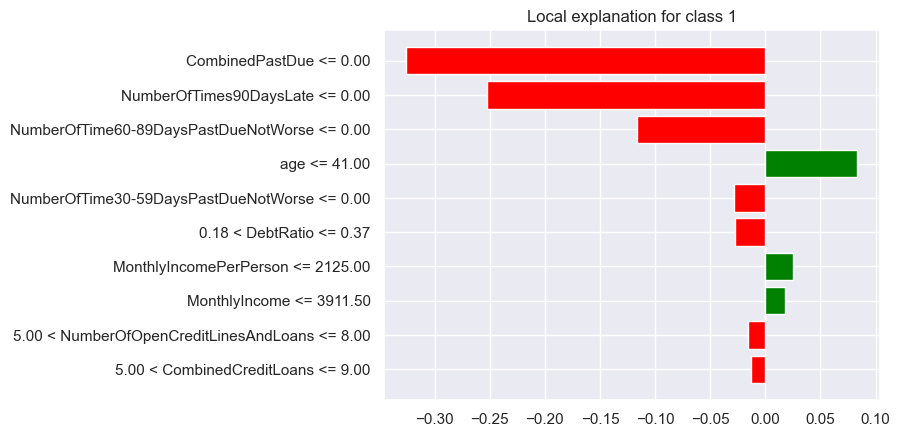

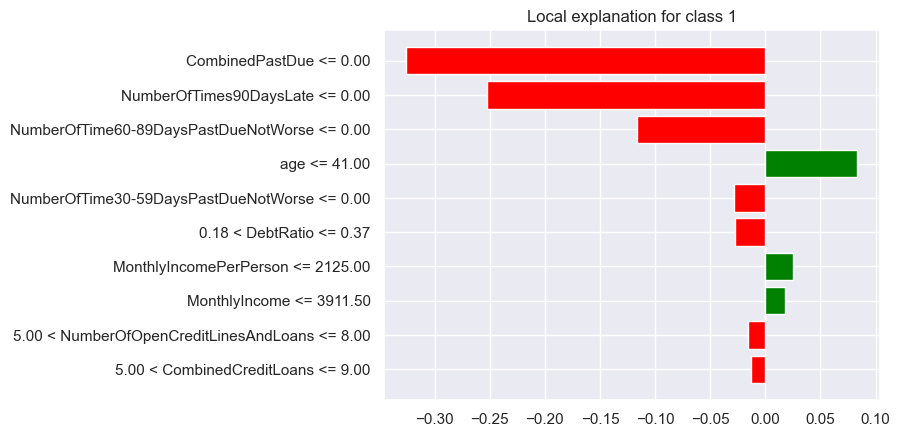

In [128]:
exp = explainer.explain_instance(df_test.iloc[3], 
     predict_model_lgb, num_features=10)
exp.as_pyplot_figure()

* Green/Red color: features that have positive correlations with the target are shown in green, otherwise red.

* No of times 30-59, 59-90 days and 90 days past due having no values means not missed any due date showing veryr high negative correlation with the target

* age having less values lower than 41 relatively show positive corrrelation with the target

In [129]:
# storing a new observation
i = 37
X_observation = df_test.iloc[[i], :]

# explanation using the random forest model
explanation = explainer.explain_instance(X_observation.values[0], predict_model_lgb)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)
        

0.761212087074914


- Each feature’s contribution to this prediction is shown in the right bar plot. Orange signifies the positive impact and blue signifies the negative impact of that feature on the target. For example, CombinedPastDue has a positive impact on defaulting for this row.

In [130]:
# storing a new observation
i = 25
X_observation = df_test.iloc[[i], :]

# explanation using the random forest model
explanation = explainer.explain_instance(X_observation.values[0], predict_model_lgb)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.41517237431835585


- Each feature’s contribution to this prediction is shown in the right bar plot. Orange signifies the positive impact and blue signifies the negative impact of that feature on the target. For example, CombinedPastDue has a positive impact on non delinquency for this row which has value 0 and Monthly Income feature having value greater than 73000 contributing towards non delinquency.